# Constructs the initial QSAR models via random forest to obtain the set of top 20 descriptors

In [7]:
import pandas as pd
import numpy as np

df0 = pd.read_csv('DataModel/Aurora_final.csv', header = 0)

In [8]:
len(df0)

1696

In [9]:
df0.head(2)

STATUS       MW     LogP  nHAcc  nHDon  \
0  Intermediate  374.832  2.97458      6      2   
1      Inactive  373.800  3.06098      6      2   

                              canonical_smiles  standard_value  \
0  CC(CN(C)C)Oc1ccc(Cl)cc1NC(=O)Nc1cnc(C#N)cn1          3229.0   
1  CC1(COc2ccc(Cl)cc2NC(=O)Nc2cnc(C#N)cn2)COC1         10000.0   

                                 SMILES_desalt     pIC50 molecule_chembl_id  
0  CC(CN(C)C)Oc1ccc(Cl)cc1NC(=O)Nc1cnc(C#N)cn1  5.490932       CHEMBL425904  
1  CC1(COc2ccc(Cl)cc2NC(=O)Nc2cnc(C#N)cn2)COC1  5.000000       CHEMBL192161

In [10]:
df0 = df0.rename(columns = {'molecule_chembl_id':'chemblId'})
df0.head(2)

STATUS       MW     LogP  nHAcc  nHDon  \
0  Intermediate  374.832  2.97458      6      2   
1      Inactive  373.800  3.06098      6      2   

                              canonical_smiles  standard_value  \
0  CC(CN(C)C)Oc1ccc(Cl)cc1NC(=O)Nc1cnc(C#N)cn1          3229.0   
1  CC1(COc2ccc(Cl)cc2NC(=O)Nc2cnc(C#N)cn2)COC1         10000.0   

                                 SMILES_desalt     pIC50      chemblId  
0  CC(CN(C)C)Oc1ccc(Cl)cc1NC(=O)Nc1cnc(C#N)cn1  5.490932  CHEMBL425904  
1  CC1(COc2ccc(Cl)cc2NC(=O)Nc2cnc(C#N)cn2)COC1  5.000000  CHEMBL192161

In [11]:
df = df0[['chemblId','pIC50']]

In [12]:
df.head()

chemblId     pIC50
0  CHEMBL425904  5.490932
1  CHEMBL192161  5.000000
2  CHEMBL204318  7.769551
3  CHEMBL203507  6.161151
4  CHEMBL206374  5.408935

In [13]:
path = r'Data/MolFingerprints/'

Fp1  = pd.read_csv(path + 'CDK.csv'               , header = 0)
Fp2  = pd.read_csv(path + 'CDKextended.csv'       , header = 0)
Fp3  = pd.read_csv(path + 'EState.csv'            , header = 0)
Fp4  = pd.read_csv(path + 'CDKgraphonly.csv'      , header = 0)
Fp5  = pd.read_csv(path + 'MACCS.csv'             , header = 0)
Fp6  = pd.read_csv(path + 'PubChem.csv'           , header = 0)
Fp7  = pd.read_csv(path + 'Substructure.csv'      , header = 0)
Fp8  = pd.read_csv(path + 'SubstructureCount.csv' , header = 0)
Fp9  = pd.read_csv(path + 'KlekotaRoth.csv'       , header = 0)
Fp10 = pd.read_csv(path + 'KlekotaRothCount.csv'  , header = 0)
Fp11 = pd.read_csv(path + 'AtomPairs2D.csv'       , header = 0)
Fp12 = pd.read_csv(path + 'AtomPairs2DCount.csv'  , header = 0)

In [14]:
Fp12

Name  APC2D1_C_C  APC2D1_C_N  APC2D1_C_O  APC2D1_C_S  \
0      CHEMBL425904        11.0        12.0         3.0         0.0   
1      CHEMBL192161        13.0         9.0         5.0         0.0   
2      CHEMBL204318        17.0        15.0         7.0         0.0   
3      CHEMBL203507        18.0        17.0         7.0         0.0   
4      CHEMBL206374        24.0        17.0         7.0         1.0   
...             ...         ...         ...         ...         ...   
1691   CHEMBL514499        18.0         6.0         7.0         2.0   
1692  CHEMBL3808844        26.0         7.0         9.0         0.0   
1693  CHEMBL3990456        21.0        10.0         2.0         0.0   
1694  CHEMBL4554938        12.0        12.0         1.0         3.0   
1695  CHEMBL4864729        18.0        15.0         3.0         2.0   

      APC2D1_C_P  APC2D1_C_F  APC2D1_C_Cl  APC2D1_C_Br  APC2D1_C_I  ...  \
0            0.0         0.0          1.0          0.0         0.0  ...   
1            0.0         0.0          1.0          0.0         0.0  ...   
2            0.0         0.0          0.0          0.0         0.0  ...   
3            0.0         0.0          0.0          0.0         0.0  ...   
4            0.0         0.0          0.0          0.0         0.0  ...   
...          ...         ...          ...          ...         ...  ...   
1691         0.0         3.0          0.0          0.0         0.0  ...   
1692         0.0         2.0          0.0          0.0         0.0  ...   
1693         0.0         0.0          0.0          0.0         0.0  ...   
1694         0.0         0.0          0.0          0.0         0.0  ...   
1695         0.0         0.0          1.0          0.0         0.0  ...   

      APC2D10_I_I  APC2D10_I_B  APC2D10_I_Si  APC2D10_I_X  APC2D10_B_B  \
0             0.0          0.0           0.0          0.0          0.0   
1             0.0          0.0           0.0          0.0          0.0   
2             0.0          0.0           0.0          0.0          0.0   
3             0.0          0.0           0.0          0.0          0.0   
4             0.0          0.0           0.0          0.0          0.0   
...           ...          ...           ...          ...          ...   
1691          0.0          0.0           0.0          0.0          0.0   
1692          0.0          0.0           0.0          0.0          0.0   
1693          0.0          0.0           0.0          0.0          0.0   
1694          0.0          0.0           0.0          0.0          0.0   
1695          0.0          0.0           0.0          0.0          0.0   

      APC2D10_B_Si  APC2D10_B_X  APC2D10_Si_Si  APC2D10_Si_X  APC2D10_X_X  
0              0.0          0.0            0.0           0.0          0.0  
1              0.0          0.0            0.0           0.0          0.0  
2              0.0          0.0            0.0           0.0          0.0  
3              0.0          0.0            0.0           0.0          0.0  
4              0.0          0.0            0.0           0.0          0.0  
...            ...          ...            ...           ...          ...  
1691           0.0          0.0            0.0           0.0          0.0  
1692           0.0          0.0            0.0           0.0          0.0  
1693           0.0          0.0            0.0           0.0          0.0  
1694           0.0          0.0            0.0           0.0          0.0  
1695           0.0          0.0            0.0           0.0          0.0  

[1696 rows x 781 columns]

In [15]:
Fp1 = Fp1.rename(columns = {'Name':'chemblId'})
Fp2 = Fp2.rename(columns = {'Name':'chemblId'})
Fp3 = Fp3.rename(columns = {'Name':'chemblId'})
Fp4 = Fp4.rename(columns = {'Name':'chemblId'})
Fp5 = Fp5.rename(columns = {'Name':'chemblId'})
Fp6 = Fp6.rename(columns = {'Name':'chemblId'})
Fp7 = Fp7.rename(columns = {'Name':'chemblId'})
Fp8 = Fp8.rename(columns = {'Name':'chemblId'})
Fp9 = Fp9.rename(columns = {'Name':'chemblId'})
Fp10= Fp10.rename(columns = {'Name':'chemblId'})
Fp11= Fp11.rename(columns = {'Name':'chemblId'})
Fp12= Fp12.rename(columns = {'Name':'chemblId'})

In [16]:
Fp12

chemblId  APC2D1_C_C  APC2D1_C_N  APC2D1_C_O  APC2D1_C_S  \
0      CHEMBL425904        11.0        12.0         3.0         0.0   
1      CHEMBL192161        13.0         9.0         5.0         0.0   
2      CHEMBL204318        17.0        15.0         7.0         0.0   
3      CHEMBL203507        18.0        17.0         7.0         0.0   
4      CHEMBL206374        24.0        17.0         7.0         1.0   
...             ...         ...         ...         ...         ...   
1691   CHEMBL514499        18.0         6.0         7.0         2.0   
1692  CHEMBL3808844        26.0         7.0         9.0         0.0   
1693  CHEMBL3990456        21.0        10.0         2.0         0.0   
1694  CHEMBL4554938        12.0        12.0         1.0         3.0   
1695  CHEMBL4864729        18.0        15.0         3.0         2.0   

      APC2D1_C_P  APC2D1_C_F  APC2D1_C_Cl  APC2D1_C_Br  APC2D1_C_I  ...  \
0            0.0         0.0          1.0          0.0         0.0  ...   
1            0.0         0.0          1.0          0.0         0.0  ...   
2            0.0         0.0          0.0          0.0         0.0  ...   
3            0.0         0.0          0.0          0.0         0.0  ...   
4            0.0         0.0          0.0          0.0         0.0  ...   
...          ...         ...          ...          ...         ...  ...   
1691         0.0         3.0          0.0          0.0         0.0  ...   
1692         0.0         2.0          0.0          0.0         0.0  ...   
1693         0.0         0.0          0.0          0.0         0.0  ...   
1694         0.0         0.0          0.0          0.0         0.0  ...   
1695         0.0         0.0          1.0          0.0         0.0  ...   

      APC2D10_I_I  APC2D10_I_B  APC2D10_I_Si  APC2D10_I_X  APC2D10_B_B  \
0             0.0          0.0           0.0          0.0          0.0   
1             0.0          0.0           0.0          0.0          0.0   
2             0.0          0.0           0.0          0.0          0.0   
3             0.0          0.0           0.0          0.0          0.0   
4             0.0          0.0           0.0          0.0          0.0   
...           ...          ...           ...          ...          ...   
1691          0.0          0.0           0.0          0.0          0.0   
1692          0.0          0.0           0.0          0.0          0.0   
1693          0.0          0.0           0.0          0.0          0.0   
1694          0.0          0.0           0.0          0.0          0.0   
1695          0.0          0.0           0.0          0.0          0.0   

      APC2D10_B_Si  APC2D10_B_X  APC2D10_Si_Si  APC2D10_Si_X  APC2D10_X_X  
0              0.0          0.0            0.0           0.0          0.0  
1              0.0          0.0            0.0           0.0          0.0  
2              0.0          0.0            0.0           0.0          0.0  
3              0.0          0.0            0.0           0.0          0.0  
4              0.0          0.0            0.0           0.0          0.0  
...            ...          ...            ...           ...          ...  
1691           0.0          0.0            0.0           0.0          0.0  
1692           0.0          0.0            0.0           0.0          0.0  
1693           0.0          0.0            0.0           0.0          0.0  
1694           0.0          0.0            0.0           0.0          0.0  
1695           0.0          0.0            0.0           0.0          0.0  

[1696 rows x 781 columns]

In [17]:
#Transform features by scaling each feature to a given range.

from sklearn import preprocessing


def normalized (Fp):
    
    chemblId = Fp.chemblId
    Fp_loc = Fp.iloc[:,1:] #all features
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(Fp_loc)
    Fp_normalized = pd.DataFrame(np_scaled)
    Fp_normalized
    Fp_normalized = pd.DataFrame(np_scaled, columns=Fp_loc.columns)
    Fp_normalized['chemblId'] = chemblId
    
    return Fp_normalized

In [18]:
Fp1_n  = normalized (Fp1 )
Fp2_n  = normalized (Fp2 )
Fp3_n  = normalized (Fp3 )
Fp4_n  = normalized (Fp4 )
Fp5_n  = normalized (Fp5 )
Fp6_n  = normalized (Fp6 )
Fp7_n  = normalized (Fp7 )
Fp8_n  = normalized (Fp8 )
Fp9_n  = normalized (Fp9 )
Fp10_n = normalized (Fp10)
Fp11_n = normalized (Fp11)
Fp12_n = normalized (Fp12)

In [19]:
Fp12_n

APC2D1_C_C  APC2D1_C_N  APC2D1_C_O  APC2D1_C_S  APC2D1_C_P  APC2D1_C_F  \
0       0.083333        0.50         0.3         0.0         0.0    0.000000   
1       0.166667        0.35         0.5         0.0         0.0    0.000000   
2       0.333333        0.65         0.7         0.0         0.0    0.000000   
3       0.375000        0.75         0.7         0.0         0.0    0.000000   
4       0.625000        0.75         0.7         0.2         0.0    0.000000   
...          ...         ...         ...         ...         ...         ...   
1691    0.375000        0.20         0.7         0.4         0.0    0.500000   
1692    0.708333        0.25         0.9         0.0         0.0    0.333333   
1693    0.500000        0.40         0.2         0.0         0.0    0.000000   
1694    0.125000        0.50         0.1         0.6         0.0    0.000000   
1695    0.375000        0.65         0.3         0.4         0.0    0.000000   

      APC2D1_C_Cl  APC2D1_C_Br  APC2D1_C_I  APC2D1_C_B  ...  APC2D10_I_B  \
0             0.5          0.0         0.0         0.0  ...          0.0   
1             0.5          0.0         0.0         0.0  ...          0.0   
2             0.0          0.0         0.0         0.0  ...          0.0   
3             0.0          0.0         0.0         0.0  ...          0.0   
4             0.0          0.0         0.0         0.0  ...          0.0   
...           ...          ...         ...         ...  ...          ...   
1691          0.0          0.0         0.0         0.0  ...          0.0   
1692          0.0          0.0         0.0         0.0  ...          0.0   
1693          0.0          0.0         0.0         0.0  ...          0.0   
1694          0.0          0.0         0.0         0.0  ...          0.0   
1695          0.5          0.0         0.0         0.0  ...          0.0   

      APC2D10_I_Si  APC2D10_I_X  APC2D10_B_B  APC2D10_B_Si  APC2D10_B_X  \
0              0.0          0.0          0.0           0.0          0.0   
1              0.0          0.0          0.0           0.0          0.0   
2              0.0          0.0          0.0           0.0          0.0   
3              0.0          0.0          0.0           0.0          0.0   
4              0.0          0.0          0.0           0.0          0.0   
...            ...          ...          ...           ...          ...   
1691           0.0          0.0          0.0           0.0          0.0   
1692           0.0          0.0          0.0           0.0          0.0   
1693           0.0          0.0          0.0           0.0          0.0   
1694           0.0          0.0          0.0           0.0          0.0   
1695           0.0          0.0          0.0           0.0          0.0   

      APC2D10_Si_Si  APC2D10_Si_X  APC2D10_X_X       chemblId  
0               0.0           0.0          0.0   CHEMBL425904  
1               0.0           0.0          0.0   CHEMBL192161  
2               0.0           0.0          0.0   CHEMBL204318  
3               0.0           0.0          0.0   CHEMBL203507  
4               0.0           0.0          0.0   CHEMBL206374  
...             ...           ...          ...            ...  
1691            0.0           0.0          0.0   CHEMBL514499  
1692            0.0           0.0          0.0  CHEMBL3808844  
1693            0.0           0.0          0.0  CHEMBL3990456  
1694            0.0           0.0          0.0  CHEMBL4554938  
1695            0.0           0.0          0.0  CHEMBL4864729  

[1696 rows x 781 columns]

In [20]:
Fp1_n .to_csv('Fp_normalized/CDK.csv'               , sep=',' ,index=False)
Fp2_n .to_csv('Fp_normalized/CDKextended.csv'       , sep=',' ,index=False)
Fp3_n .to_csv('Fp_normalized/EState.csv'            , sep=',' ,index=False)
Fp4_n .to_csv('Fp_normalized/CDKgraphonly.csv'      , sep=',' ,index=False)
Fp5_n .to_csv('Fp_normalized/MACCS.csv'             , sep=',' ,index=False)
Fp6_n .to_csv('Fp_normalized/PubChem.csv'           , sep=',' ,index=False)
Fp7_n .to_csv('Fp_normalized/Substructure.csv'      , sep=',' ,index=False)
Fp8_n .to_csv('Fp_normalized/SubstructureCount.csv' , sep=',' ,index=False)
Fp9_n .to_csv('Fp_normalized/KlekotaRoth.csv'       , sep=',' ,index=False)
Fp10_n.to_csv('Fp_normalized/KlekotaRothCount.csv'  , sep=',' ,index=False)
Fp11_n.to_csv('Fp_normalized/AtomPairs2D.csv'       , sep=',' ,index=False)
Fp12_n.to_csv('Fp_normalized/AtomPairs2DCount.csv'  , sep=',' ,index=False)

In [21]:
Fp1


chemblId  FP1  FP2  FP3  FP4  FP5  FP6  FP7  FP8  FP9  ...  FP1015  \
0      CHEMBL425904    0    1    0    0    0    0    1    0    1  ...       0   
1      CHEMBL192161    0    1    0    0    0    0    1    0    1  ...       1   
2      CHEMBL204318    0    1    0    0    0    0    1    0    0  ...       1   
3      CHEMBL203507    0    1    0    0    0    1    1    0    1  ...       1   
4      CHEMBL206374    0    1    0    0    0    0    1    0    0  ...       1   
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...   
1691   CHEMBL514499    1    1    1    0    0    0    1    0    0  ...       0   
1692  CHEMBL3808844    1    0    1    0    1    0    0    0    0  ...       0   
1693  CHEMBL3990456    1    1    0    0    0    0    0    0    0  ...       0   
1694  CHEMBL4554938    0    1    0    1    1    0    0    0    1  ...       0   
1695  CHEMBL4864729    0    1    0    0    0    1    1    0    1  ...       0   

      FP1016  FP1017  FP1018  FP1019  FP1020  FP1021  FP1022  FP1023  FP1024  
0          1       0       0       0       0       0       1       0       0  
1          1       0       0       1       0       0       0       0       0  
2          1       0       0       0       0       0       0       0       0  
3          1       0       0       0       0       0       0       0       0  
4          1       0       0       0       0       0       0       0       0  
...      ...     ...     ...     ...     ...     ...     ...     ...     ...  
1691       1       0       1       0       0       0       1       0       0  
1692       1       0       1       0       0       0       0       1       0  
1693       1       1       0       1       0       1       1       1       1  
1694       1       0       0       1       0       1       1       0       0  
1695       1       0       0       0       0       0       1       0       1  

[1696 rows x 1025 columns]

In [22]:
raw1  = df.merge(Fp1_n , on='chemblId', how='outer')
raw2  = df.merge(Fp2_n , on='chemblId', how='outer')
raw3  = df.merge(Fp3_n , on='chemblId', how='outer')
raw4  = df.merge(Fp4_n , on='chemblId', how='outer')
raw5  = df.merge(Fp5_n , on='chemblId', how='outer')
raw6  = df.merge(Fp6_n , on='chemblId', how='outer')
raw7  = df.merge(Fp7_n , on='chemblId', how='outer')
raw8  = df.merge(Fp8_n , on='chemblId', how='outer')
raw9  = df.merge(Fp9_n , on='chemblId', how='outer')
raw10 = df.merge(Fp10_n, on='chemblId', how='outer')
raw11 = df.merge(Fp11_n, on='chemblId', how='outer')
raw12 = df.merge(Fp12_n, on='chemblId', how='outer')

In [23]:
raw12.tail(10)

chemblId     pIC50  APC2D1_C_C  APC2D1_C_N  APC2D1_C_O  APC2D1_C_S  \
1686   CHEMBL572878  9.221849    0.333333        0.70         0.1         0.4   
1687   CHEMBL402548  7.886057    0.500000        0.55         0.4         0.0   
1688   CHEMBL482767  8.045757    0.166667        0.50         0.1         0.8   
1689   CHEMBL482967  8.096910    0.166667        0.50         0.2         0.4   
1690  CHEMBL1090479  6.698970    0.666667        0.65         0.1         0.0   
1691   CHEMBL514499  5.318759    0.375000        0.20         0.7         0.4   
1692  CHEMBL3808844  7.443697    0.708333        0.25         0.9         0.0   
1693  CHEMBL3990456  7.638272    0.500000        0.40         0.2         0.0   
1694  CHEMBL4554938  7.712198    0.125000        0.50         0.1         0.6   
1695  CHEMBL4864729  7.657577    0.375000        0.65         0.3         0.4   

      APC2D1_C_P  APC2D1_C_F  APC2D1_C_Cl  APC2D1_C_Br  ...  APC2D10_I_I  \
1686         0.0    0.000000          0.0          0.0  ...          0.0   
1687         0.0    0.000000          0.0          0.0  ...          0.0   
1688         0.0    0.000000          0.5          0.0  ...          0.0   
1689         0.0    0.000000          0.0          0.0  ...          0.0   
1690         0.0    0.000000          0.0          0.0  ...          0.0   
1691         0.0    0.500000          0.0          0.0  ...          0.0   
1692         0.0    0.333333          0.0          0.0  ...          0.0   
1693         0.0    0.000000          0.0          0.0  ...          0.0   
1694         0.0    0.000000          0.0          0.0  ...          0.0   
1695         0.0    0.000000          0.5          0.0  ...          0.0   

      APC2D10_I_B  APC2D10_I_Si  APC2D10_I_X  APC2D10_B_B  APC2D10_B_Si  \
1686          0.0           0.0          0.0          0.0           0.0   
1687          0.0           0.0          0.0          0.0           0.0   
1688          0.0           0.0          0.0          0.0           0.0   
1689          0.0           0.0          0.0          0.0           0.0   
1690          0.0           0.0          0.0          0.0           0.0   
1691          0.0           0.0          0.0          0.0           0.0   
1692          0.0           0.0          0.0          0.0           0.0   
1693          0.0           0.0          0.0          0.0           0.0   
1694          0.0           0.0          0.0          0.0           0.0   
1695          0.0           0.0          0.0          0.0           0.0   

      APC2D10_B_X  APC2D10_Si_Si  APC2D10_Si_X  APC2D10_X_X  
1686          0.0            0.0           0.0          0.0  
1687          0.0            0.0           0.0          0.0  
1688          0.0            0.0           0.0          0.0  
1689          0.0            0.0           0.0          0.0  
1690          0.0            0.0           0.0          0.0  
1691          0.0            0.0           0.0          0.0  
1692          0.0            0.0           0.0          0.0  
1693          0.0            0.0           0.0          0.0  
1694          0.0            0.0           0.0          0.0  
1695          0.0            0.0           0.0          0.0  

[10 rows x 782 columns]

In [24]:
raw1 .set_index('chemblId', inplace=True) 
raw2 .set_index('chemblId', inplace=True) 
raw3 .set_index('chemblId', inplace=True) 
raw4 .set_index('chemblId', inplace=True) 
raw5 .set_index('chemblId', inplace=True) 
raw6 .set_index('chemblId', inplace=True) 
raw7 .set_index('chemblId', inplace=True)
raw8 .set_index('chemblId', inplace=True)
raw9 .set_index('chemblId', inplace=True)
raw10.set_index('chemblId', inplace=True)
raw11.set_index('chemblId', inplace=True)
raw12.set_index('chemblId', inplace=True)

In [25]:
raw1 .to_csv('QSAR/CDK_Aurora.csv'               , sep=',' ,index=True)
raw2 .to_csv('QSAR/CDKextended_Aurora.csv'       , sep=',' ,index=True)
raw3 .to_csv('QSAR/EState_Aurora.csv'            , sep=',' ,index=True)
raw4 .to_csv('QSAR/CDKgraphOnly_Aurora.csv'      , sep=',' ,index=True)
raw5 .to_csv('QSAR/MACCS_Aurora.csv'             , sep=',' ,index=True)
raw6 .to_csv('QSAR/PubChem_Aurora.csv'           , sep=',' ,index=True)
raw7 .to_csv('QSAR/Substructure_Aurora.csv'      , sep=',' ,index=True)
raw8 .to_csv('QSAR/SubstructureCount_Aurora.csv' , sep=',' ,index=True)
raw9 .to_csv('QSAR/KlekotaRoth_Aurora.csv'       , sep=',' ,index=True)
raw10.to_csv('QSAR/KlekotaRothCount_Aurora.csv'  , sep=',' ,index=True)
raw11.to_csv('QSAR/AtomPairs2D_Aurora.csv'       , sep=',' ,index=True)
raw12.to_csv('QSAR/AtomPairs2DCount_Aurora.csv'  , sep=',' ,index=True)

In [26]:
print (len(raw1 ),len(raw2 ),len(raw3 ),len(raw4 ),len(raw5 )
      ,len(raw6 ),len(raw7 ),len(raw8 ),len(raw9 ),len(raw10)
      ,len(raw11),len(raw12))

1696 1696 1696 1696 1696 1696 1696 1696 1696 1696 1696 1696


In [27]:
print (len(raw1 .columns),len(raw2 .columns),len(raw3 .columns),len(raw4 .columns),len(raw5 .columns )
      ,len(raw6 .columns),len(raw7 .columns),len(raw8 .columns),len(raw9 .columns),len(raw10 .columns)
      ,len(raw11.columns),len(raw12.columns))

1025 1025 80 1025 167 882 308 308 4861 4861 781 781


# Build function

In [28]:
#Constructs the initial QSAR models via random forest to obtain the set of top 20 descriptors

In [29]:
import numpy as np

def Remove_useless_descriptor(df, threshold):
    
    des1 = len(df.columns) #number of features
    
    h = df.columns.tolist()
    df = df.to_numpy().astype(float)
    df = np.array(df)

    STDEV = np.std(df, axis=0) #standard deviation along the  column.
    idx = [idx for idx, val in enumerate(STDEV) if val > threshold] #iterate over the index and value of an item in a list
    df2 = df[:,idx]
    hx = np.array(h)[idx]
    
    
    df = pd.DataFrame(df2, columns=[hx])
        
    des2 = len(df.columns)
    
    print ('from Remove useless descriptor:')
    print ("The initial set of " + str(des1) + \
          " descriptors has been reduced to " + str(des2) + " descriptors.")
    
    return df, des1, des2

In [30]:
from scipy import stats

def correlation(df, threshold):

    des3 = len(df.columns) 
    
    corr = stats.pearsonr #The Pearson correlation coefficient measures the linear relationship between two datasets.
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname] # deleting the column from the dataset
    des4 = len(df.columns) 

    print ('from Remove correlation')
    print ("The initial set of " + str(des3) + ' descriptors'+ 
           " has been reduced to " + str(des4) + " descriptors.")

    return df, des3, des4

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from collections import defaultdict

def build_model(X, Y, seed, hx, f):
    
    
    #Data split using 70/30 ratio
    X_internal, X_external, Y_internal, Y_external = train_test_split(X,
                                                        Y, test_size=0.2,
                                                        random_state=seed)

    # Training set
    rf = RandomForestRegressor(n_estimators=800, 
                               max_features='sqrt',
                               max_depth= 15,
                               min_samples_leaf = 2,
                               min_samples_split = 2,
                               random_state = 13,
                               n_jobs=-1)
    
    #min_samples_split = 10, random_state = 13,

    
    rf.fit(X_internal,Y_internal)
    prediction = rf.predict(X_internal)
    
    # Cross-validation
    cv = cross_val_predict(rf, X_internal, Y_internal, cv=10, n_jobs=-1)
    
    # External set  
    prediction_external = rf.predict(X_external)
    
    #print result from each seed    
    R2_train.append(r2_score(Y_internal, prediction))
    RMSE_train.append(np.sqrt(mean_absolute_error(Y_internal, prediction)))
    Q2_CV.append(r2_score(Y_internal, cv))
    RMSE_CV.append(np.sqrt(mean_absolute_error(Y_internal, cv)))
    Q2_External.append(r2_score(Y_external, prediction_external))
    RMSE_External.append((mean_absolute_error(Y_external, prediction_external)))
    
    
    #Feature Importance
  
    
    Feature = hx[:]
    feature_importance = rf.feature_importances_
    importances = 100.0 * (feature_importance / feature_importance.max()) #index
    
    for i, fx in enumerate(Feature):
        importances_dict[fx[0]].append(importances[i])
        
        
        
    
    return R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, Feature, \
           X_internal, X_external, Y_internal, Y_external, rf, prediction, importances_dict


In [32]:
from copy import deepcopy

def Y_scrambling(X_internal, X_external, Y_internal, Y_external):
    # Do the Y-scrambling. Loop over the actual learning for 100 times.
    for randomseedcounter in range(1,101):
        y_train_scrambled = deepcopy(Y_internal)
        X_train_scrambled = deepcopy(X_internal)
        np.random.shuffle(y_train_scrambled)
        np.random.shuffle(X_train_scrambled)

        # training was done on "scrambled" data - prediction on test set
        RF_scrambled         = RandomForestRegressor()
        RF_scrambled         = RF_scrambled.fit(X_internal,y_train_scrambled)
        y_predict_scrambled  = RF_scrambled.predict(X_external)
    
        acclist_predictionOnTest_scrambledtrain.append((RF_scrambled.score(X_external,Y_external))**2)
    
        # training was done on "scrambled" data - prediction on train set
        y_predict_scrambled_predictTrain  = RF_scrambled.predict(X_internal)
    
        acclist_predictionOnTrain_scrambledtrain.append((RF_scrambled.score(X_internal,Y_internal))**2)
        
        r2 = pd.DataFrame(acclist_predictionOnTrain_scrambledtrain, columns=['R2'])
        q2 = pd.DataFrame(acclist_predictionOnTest_scrambledtrain, columns=['Q2'])

        #result = pd.concat([r2, q2], axis=1, join='inner').to_csv(f+"_Y_scrambling.csv", header=False, index=False)
        
        
    return acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain

In [33]:
def mean(R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, importances_dict):
    R2_train_mean = np.mean(R2_train)
    RMSE_train_mean = np.mean(RMSE_train)
    Q2_CV_mean = np.mean(Q2_CV)
    RMSE_CV_mean = np.mean(RMSE_CV)
    Q2_External_mean = np.mean(Q2_External)
    RMSE_External_mean = np.mean(RMSE_External)
    importances_mean0 = {}
    for fx in importances_dict:
        importances_mean0[fx] = np.mean(importances_dict[fx])
    importances_mean = sorted([(k,v) for k,v in importances_mean0.items()],
                                    key=lambda x: x[1], reverse=True)
    
    #predictionOnTest_mean = np.mean(acclist_predictionOnTest_scrambledtrain)
    #predictionOnTrain_mean = np.mean(acclist_predictionOnTrain_scrambledtrain)
    
    return R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, \
            RMSE_External_mean, importances_mean

In [34]:
def std(R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, importances_dict):
    R2_train_std = np.std(R2_train)
    RMSE_train_std = np.std(RMSE_train)
    Q2_CV_std = np.std(Q2_CV)
    RMSE_CV_std = np.std(RMSE_CV)
    Q2_External_std = np.std(Q2_External)
    RMSE_External_std = np.std(RMSE_External)
    importances_std0 = {}
    for fx in importances_dict:
        importances_std0[fx] = np.std(importances_dict[fx])
    importances_std = sorted([(k,v) for k,v in importances_std0.items()],
                                    key=lambda x: x[1], reverse=True)
    #predictionOnTest_std = np.std(acclist_predictionOnTest_scrambledtrain)
    #predictionOnTrain_std = np.std(acclist_predictionOnTrain_scrambledtrain)
    
    return R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std,\
            RMSE_External_std, importances_std

In [35]:
def print_output(R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, 
           RMSE_External_mean, R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std, 
           RMSE_External_std, X_internal, X_external, X, f, des1, des2 ):
    #outfile = open('all_output.csv', 'a')
    name = [os.path.basename(f)]
    print_out = name
    print_out = [name.replace('.smi','') for name in print_out]
    
    print (outfile, '%s,%d,%d,%d,%d,%0.4f,%0.4f,%0.4f,%0.4f,%d,%0.4f,%0.4f,%0.4f,%0.4f,%d,%0.4f,%0.4f,%0.4f,%0.4f' \
                                     % (print_out, len(X_internal),
                                        des1, des2, des4,
                                        R2_train_mean, R2_train_std,
                                        RMSE_train_mean, RMSE_train_std,
                                        len(X_internal),
                                        Q2_CV_mean, Q2_CV_std,
                                        RMSE_CV_mean, RMSE_CV_std,
                                        len(X_external),
                                        Q2_External_mean, Q2_External_std,
                                        RMSE_External_mean, RMSE_External_std,))
 
    print ('\nTraining set\n------------')
    print ('N: ' + (str(len(X_internal))))
    print ('R2: %0.4f'%(R2_train_mean))
    print ('std_R2: %0.4f'%(R2_train_std))
    print ('RMSE: %0.4f'%(RMSE_train_mean))
    print ('std_RMSE: %0.4f'%(RMSE_train_std))

    print ('\nCross-validation set\n------------')
    print ('N: ' + (str(len(X_internal))))
    print ('Q2: %0.4f'%(Q2_CV_mean))
    print ('std_Q2: %0.4f'%(Q2_CV_std))
    print ('RMSE: %0.4f'%(RMSE_CV_mean))
    print ('std_RMSE: %0.4f'%(RMSE_CV_std))

    print ('\nExternal set\n------------')
    print ('N: ' + (str(len(X_external))))
    print ('Q2_EXt: %0.4f'%(Q2_External_mean))
    print ('std_Q2_EXt: %0.4f'%(Q2_External_std))
    print ('RMSE: %0.4f'%(RMSE_External_mean))
    print ('std_RMSE: %0.4f'%(RMSE_External_std))

In [36]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pylab as py 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

def plot_model (f, X_internal, X_external, Y_internal, Y_external,
                R2_train_mean, Q2_External_mean,
                importances_mean, importances_std, Feature, prediction, 
                acclist_predictionOnTest_scrambledtrain, acclist_predictionOnTrain_scrambledtrain):
    
    # Prepare plot  ---------------------------------------------------------------------------------------
    m  = rf.fit(X_internal,Y_internal)
    cm = plt.cm.RdBu
    cv = cross_val_predict(rf, X_internal, Y_internal, cv=10, n_jobs=-1)

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0]=5
    fig_size[1]=5

    # Train Set   -----------------------------------------------------------------------------------------
    x_train = np.array(Y_internal)
    y_train = m.predict(X_internal).flatten()
    py.scatter(x_train, y_train, s=50, marker='.', alpha=0.3,
            c='g', cmap=cm ,edgecolors='g')
                 #label=r"$R^{2}_{Tr}$ = %.4f" % R2_train_mean)
    
    
    # CV Set   --------------------------------------------------------------------------------------------
    np.array(cv)
    x_test = np.array(Y_internal)
    y_test = cv
    py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
            c= ['b'], cmap=cm ,edgecolors='b') 
                 #label=r"$Q^{2}_{Ext}$ = %.4f" % Q2_External_mean)
        #2SD line
    X = sm.add_constant(x_test)
    res = sm.OLS(y_test, X).fit()

    st, data, ss2 = summary_table(res, alpha=0.05)
    fittedvalues = data[:,2]
        #predict_mean_se  = data[:,3]
    predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
    predict_ci_low, predict_ci_upp = data[:,6:8].T
        #2SD line
    plt.plot(X, predict_ci_low, '--b', linewidth=0.5, alpha=0.5)
    plt.plot(X, predict_ci_upp, '--b', linewidth=0.5, alpha=0.5)
        
    # External Set
    x_test = np.array(Y_external)
    y_test = m.predict(X_external).flatten()
    py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
            c='r', cmap=cm ,edgecolors='r') 
                 #label=r"$Q^{2}_{Ext}$ = %.4f" % Q2_External_mean)
    
    
    #py.plot(x_train, np.polyval(np.polyfit(x_train,y_train,1), x_train), '--r') #mean line
    plt.legend(loc=2,prop={'size':6})
    plt.xlabel("Experimental $pIC_{50}$ values", fontsize=10)
    plt.ylabel("Predicted $pIC_{50}$ values", fontsize=10)
        
    min_axis = np.min(np.concatenate([Y_internal, prediction], axis=0))
    max_axis = np.max(np.concatenate([Y_internal, prediction], axis=0))
    plt.xlim([(min_axis*0.9),(max_axis*1.05)])
    plt.ylim([(min_axis*0.9),(max_axis*1.05)])
    plt.tick_params(axis='both', which='major', labelsize=14)

    
    # Save plot to file  -----------------------------------------------------------------------------------
    plt.savefig(f+'_compair_Fp.png', dpi=300)
    plt.show()
    
    # Y-scrambling plot  -----------------------------------------------------------------------------------
    py.scatter(Q2_CV_mean, R2_train_mean, s=100, marker='.', alpha=0.3,
            c=['b'], cmap=cm ,edgecolors='b') 
            
    py.scatter(acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain, \
               s=100, marker='.', alpha=0.3, c='r', cmap=cm ,edgecolors='r')

    plt.legend(loc=2,prop={'size':6})
    plt.xlabel("$Q^{2}$", fontsize=10)
    plt.ylabel("$R^{2}$", fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=14)
    
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.axhline(0.5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
    plt.axvline(0.5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
    
    plt.savefig(f+'_Y_scrambling.png', dpi=300)

    plt.show()

    #Feature Importance --------------------------------------------------------------------------------------
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0]=5
    fig_size[1]=10

    barlist = plt.barh(range(20), [x[1] for x in importances_mean[:20]], 
          color="g", xerr=[x[1] for x in importances_std[:20]], align="center", \
                       error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))

    print (str("top10"), [x[0] for x in importances_mean[:10]])
    print ('')
    print (str("top20"), [x[0] for x in importances_mean[:20]])
    print ('')
    print (str("top30"), [x[0] for x in importances_mean[:30]])
    print ('')
    print (str("top40"), [x[0] for x in importances_mean[:40]])
    print ('')
    print (str("top50"), [x[0] for x in importances_mean[:50]])
    
    plt.yticks(range(20), [x[0] for x in importances_mean[:20]])
    plt.ylim([-1, 20])
    
    plt.xlabel(r"$\bf{Gini}$" + " "+ r"$\bf{index}$", fontsize=12)
    ax = plt.gca()
    ax.invert_yaxis()
    plt.tight_layout(pad=2.0, w_pad=0.7, h_pad=2.0)
    plt.savefig(f+'_Feature_importances.png', dpi=300)
    plt.show()



************************************************************************************

QSAR/Substructure_Aurora.csv

from Remove useless descriptor:
The initial set of 307 descriptors has been reduced to 69 descriptors.
from Remove correlation
The initial set of 69 descriptors has been reduced to 53 descriptors.
<_io.TextIOWrapper name='Result/Aurora_IC50_Revision.csv' mode='a' encoding='UTF-8'> ['Substructure_Aurora.csv'],1356,307,69,53,0.6044,0.0069,0.8307,0.0049,1356,0.4809,0.0093,0.8903,0.0054,340,0.4768,0.0345,0.7717,0.0357

Training set
------------
N: 1356
R2: 0.6044
std_R2: 0.0069
RMSE: 0.8307
std_RMSE: 0.0049

Cross-validation set
------------
N: 1356
Q2: 0.4809
std_Q2: 0.0093
RMSE: 0.8903
std_RMSE: 0.0054

External set
------------
N: 340
Q2_EXt: 0.4768
std_Q2_EXt: 0.0345
RMSE: 0.7717
std_RMSE: 0.0357


/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_train, y_train, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


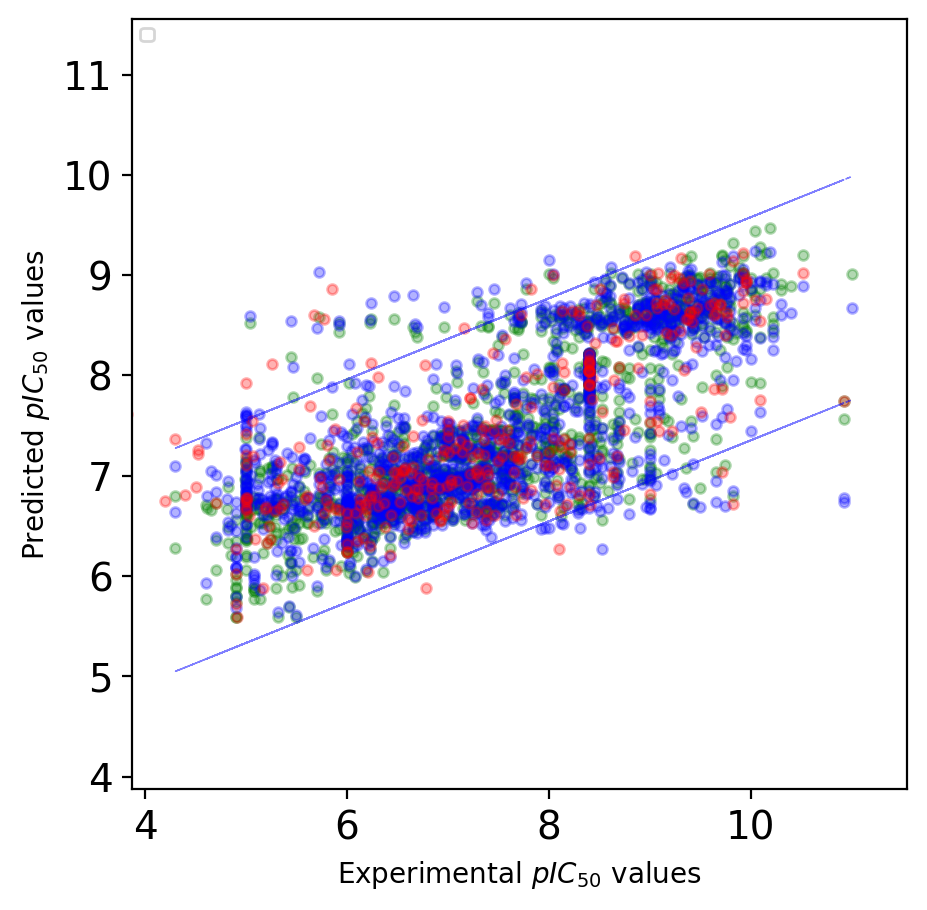

/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:74: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(Q2_CV_mean, R2_train_mean, s=100, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain, \
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


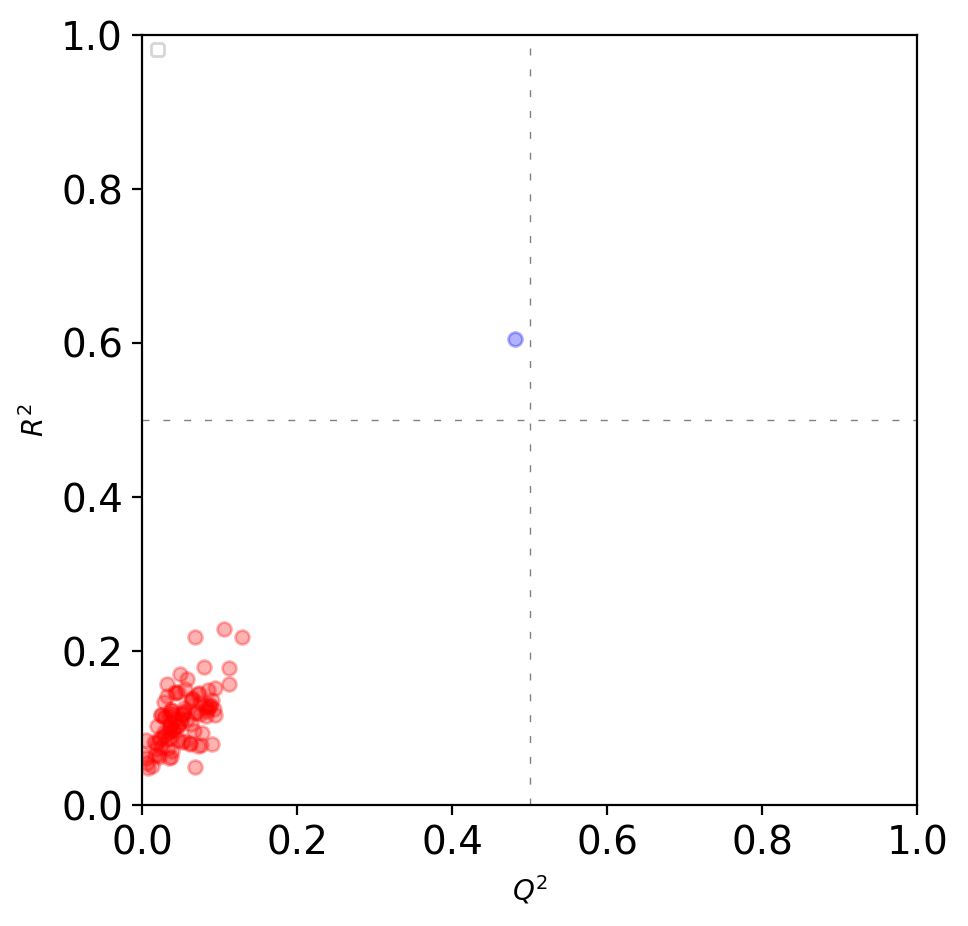

top10 ['SubFP100', 'SubFP99', 'SubFP4', 'SubFP183', 'SubFP1', 'SubFP143', 'SubFP19', 'SubFP179', 'SubFP28', 'SubFP172']

top20 ['SubFP100', 'SubFP99', 'SubFP4', 'SubFP183', 'SubFP1', 'SubFP143', 'SubFP19', 'SubFP179', 'SubFP28', 'SubFP172', 'SubFP171', 'SubFP180', 'SubFP2', 'SubFP23', 'SubFP88', 'SubFP18', 'SubFP9', 'SubFP3', 'SubFP182', 'SubFP139']

top30 ['SubFP100', 'SubFP99', 'SubFP4', 'SubFP183', 'SubFP1', 'SubFP143', 'SubFP19', 'SubFP179', 'SubFP28', 'SubFP172', 'SubFP171', 'SubFP180', 'SubFP2', 'SubFP23', 'SubFP88', 'SubFP18', 'SubFP9', 'SubFP3', 'SubFP182', 'SubFP139', 'SubFP84', 'SubFP5', 'SubFP32', 'SubFP16', 'SubFP188', 'SubFP214', 'SubFP21', 'SubFP59', 'SubFP153', 'SubFP279']

top40 ['SubFP100', 'SubFP99', 'SubFP4', 'SubFP183', 'SubFP1', 'SubFP143', 'SubFP19', 'SubFP179', 'SubFP28', 'SubFP172', 'SubFP171', 'SubFP180', 'SubFP2', 'SubFP23', 'SubFP88', 'SubFP18', 'SubFP9', 'SubFP3', 'SubFP182', 'SubFP139', 'SubFP84', 'SubFP5', 'SubFP32', 'SubFP16', 'SubFP188', 'SubFP214', 'Sub

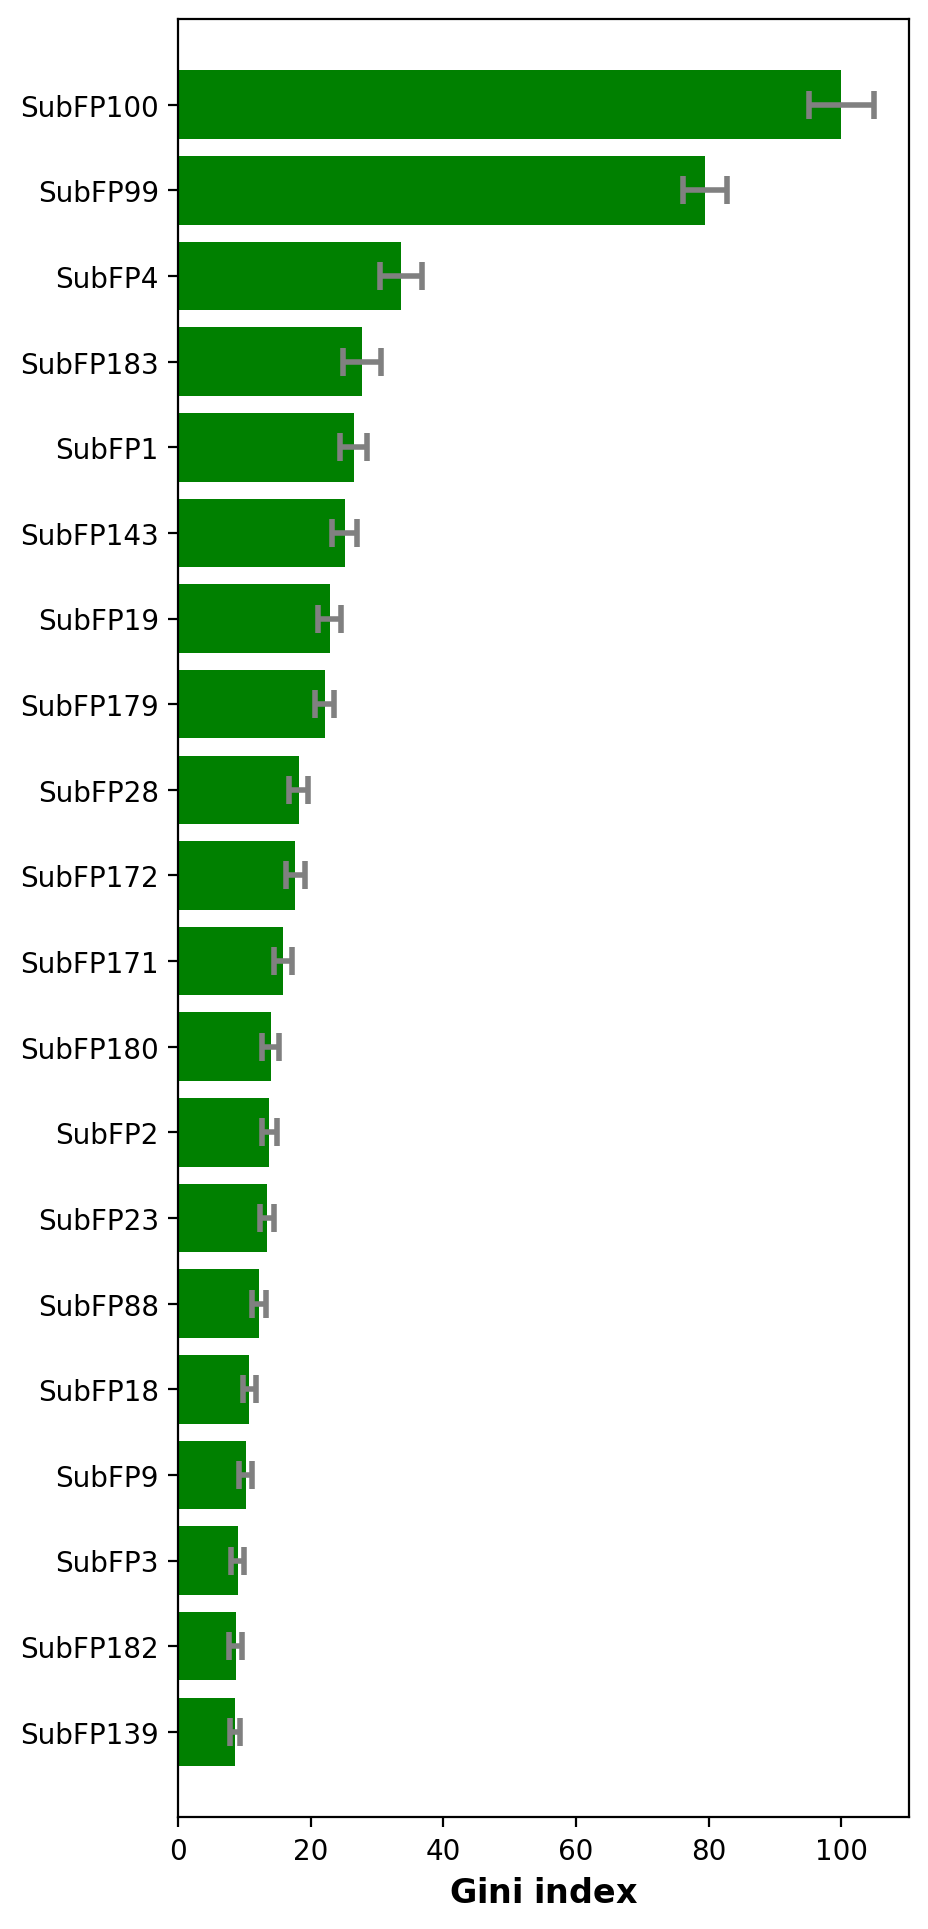



************************************************************************************

QSAR/KlekotaRoth_Aurora.csv

from Remove useless descriptor:
The initial set of 4860 descriptors has been reduced to 756 descriptors.
from Remove correlation
The initial set of 756 descriptors has been reduced to 420 descriptors.
<_io.TextIOWrapper name='Result/Aurora_IC50_Revision.csv' mode='a' encoding='UTF-8'> ['KlekotaRoth_Aurora.csv'],1356,4860,756,420,0.6790,0.0078,0.7903,0.0058,1356,0.5395,0.0107,0.8649,0.0060,340,0.5650,0.0279,0.7097,0.0394

Training set
------------
N: 1356
R2: 0.6790
std_R2: 0.0078
RMSE: 0.7903
std_RMSE: 0.0058

Cross-validation set
------------
N: 1356
Q2: 0.5395
std_Q2: 0.0107
RMSE: 0.8649
std_RMSE: 0.0060

External set
------------
N: 340
Q2_EXt: 0.5650
std_Q2_EXt: 0.0279
RMSE: 0.7097
std_RMSE: 0.0394


/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_train, y_train, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


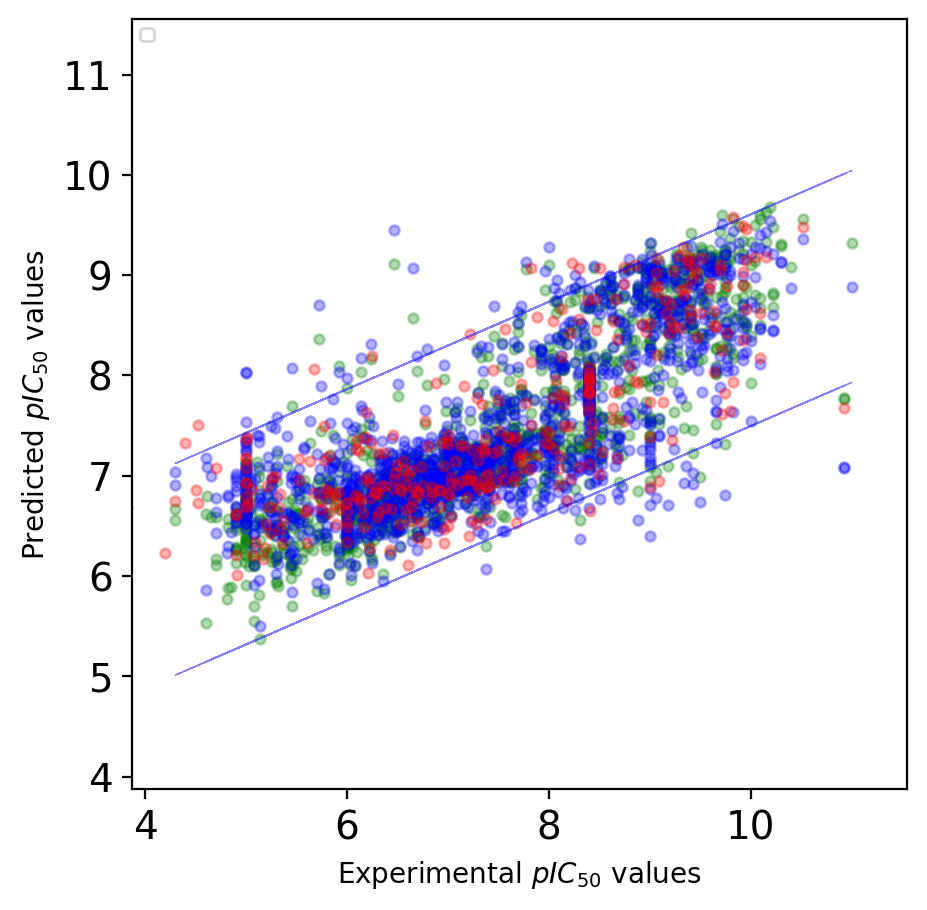

/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:74: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(Q2_CV_mean, R2_train_mean, s=100, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain, \
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


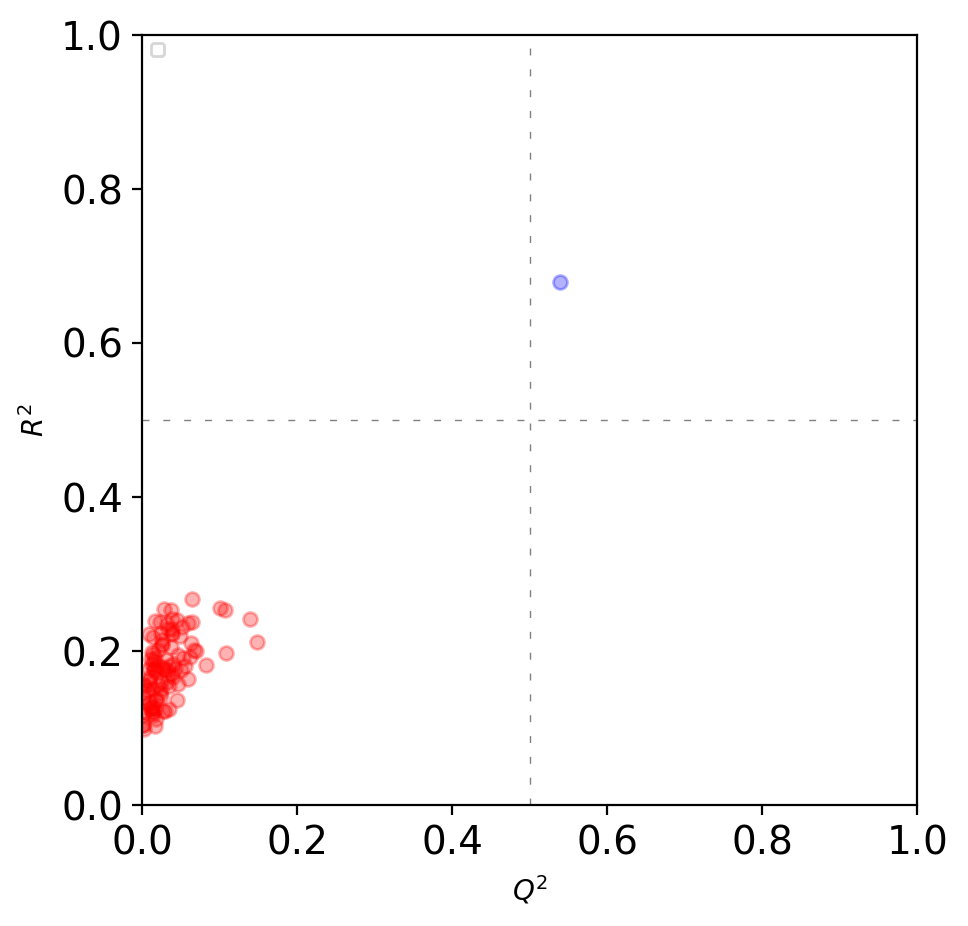

top10 ['KRFP992', 'KRFP993', 'KRFP1592', 'KRFP3943', 'KRFP839', 'KRFP3180', 'KRFP1564', 'KRFP4269', 'KRFP1146', 'KRFP678']

top20 ['KRFP992', 'KRFP993', 'KRFP1592', 'KRFP3943', 'KRFP839', 'KRFP3180', 'KRFP1564', 'KRFP4269', 'KRFP1146', 'KRFP678', 'KRFP998', 'KRFP4287', 'KRFP3013', 'KRFP1', 'KRFP2026', 'KRFP669', 'KRFP3182', 'KRFP14', 'KRFP3336', 'KRFP467']

top30 ['KRFP992', 'KRFP993', 'KRFP1592', 'KRFP3943', 'KRFP839', 'KRFP3180', 'KRFP1564', 'KRFP4269', 'KRFP1146', 'KRFP678', 'KRFP998', 'KRFP4287', 'KRFP3013', 'KRFP1', 'KRFP2026', 'KRFP669', 'KRFP3182', 'KRFP14', 'KRFP3336', 'KRFP467', 'KRFP3169', 'KRFP1594', 'KRFP3608', 'KRFP1154', 'KRFP1148', 'KRFP3139', 'KRFP4294', 'KRFP1452', 'KRFP3916', 'KRFP3600']

top40 ['KRFP992', 'KRFP993', 'KRFP1592', 'KRFP3943', 'KRFP839', 'KRFP3180', 'KRFP1564', 'KRFP4269', 'KRFP1146', 'KRFP678', 'KRFP998', 'KRFP4287', 'KRFP3013', 'KRFP1', 'KRFP2026', 'KRFP669', 'KRFP3182', 'KRFP14', 'KRFP3336', 'KRFP467', 'KRFP3169', 'KRFP1594', 'KRFP3608', 'KRFP1154', '

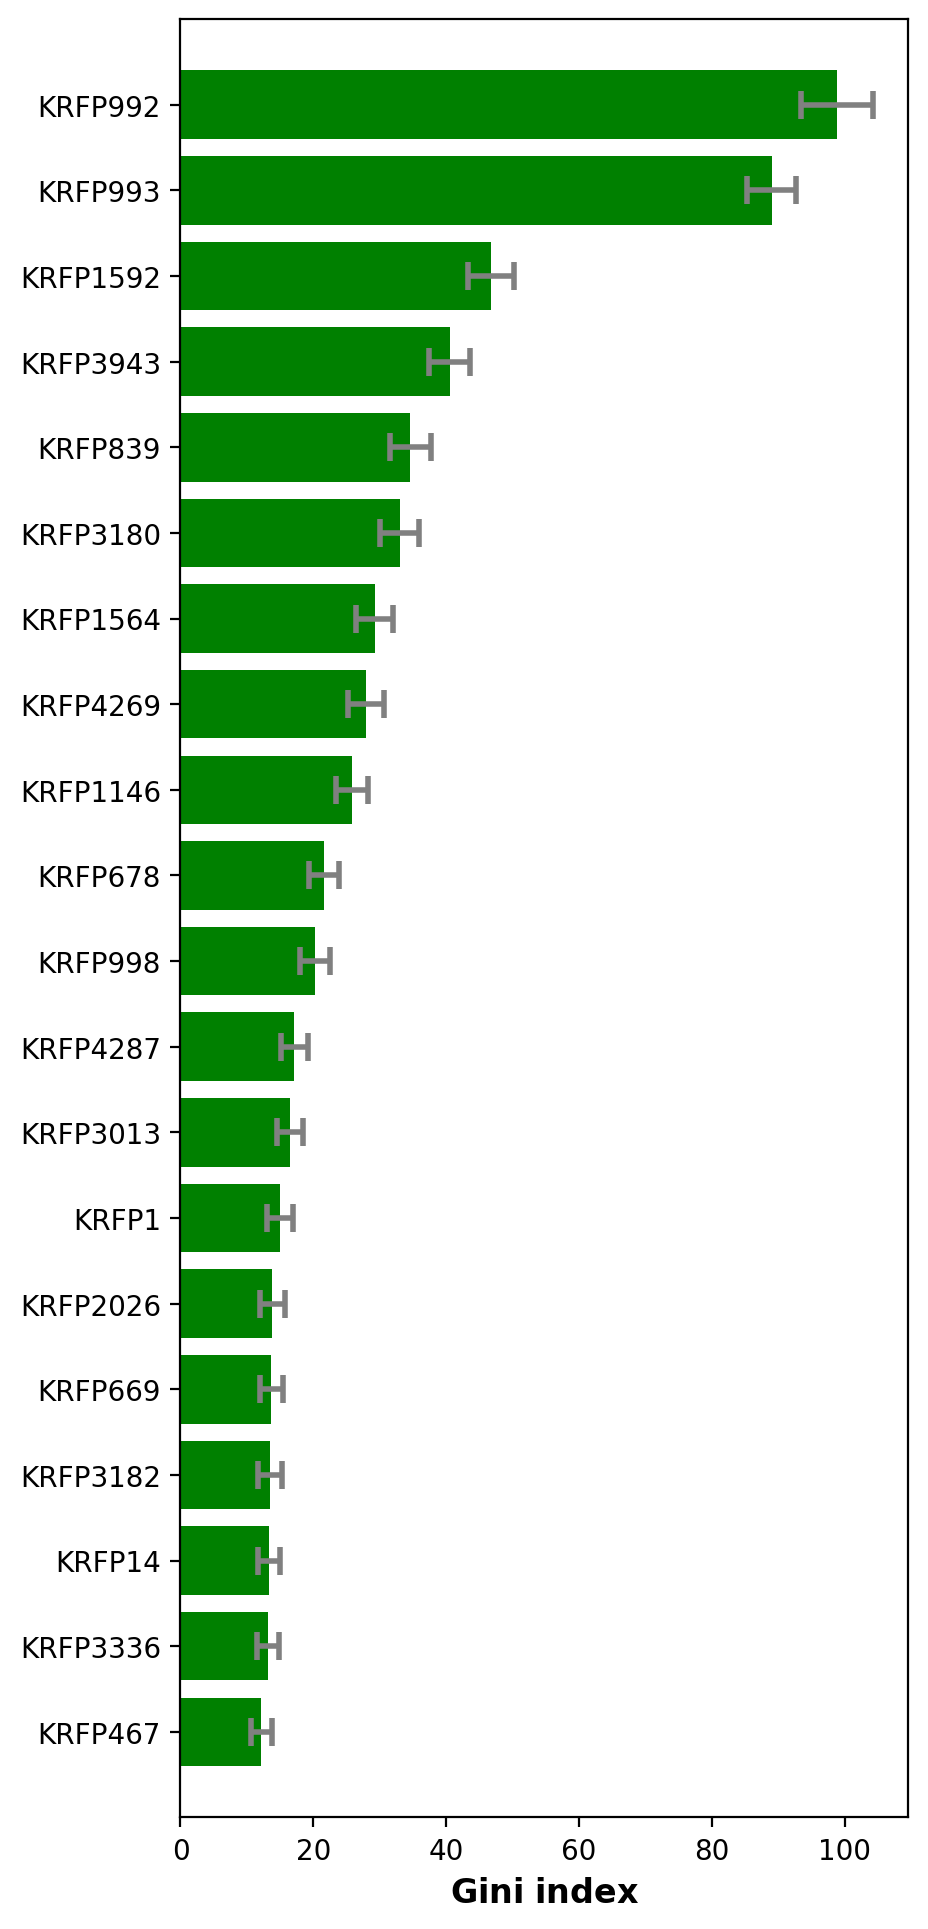



************************************************************************************

QSAR/AtomPairs2D_Aurora.csv

from Remove useless descriptor:
The initial set of 780 descriptors has been reduced to 228 descriptors.
from Remove correlation
The initial set of 228 descriptors has been reduced to 120 descriptors.
<_io.TextIOWrapper name='Result/Aurora_IC50_Revision.csv' mode='a' encoding='UTF-8'> ['AtomPairs2D_Aurora.csv'],1356,780,228,120,0.6631,0.0091,0.7943,0.0056,1356,0.4999,0.0124,0.8792,0.0060,340,0.5253,0.0408,0.7357,0.0360

Training set
------------
N: 1356
R2: 0.6631
std_R2: 0.0091
RMSE: 0.7943
std_RMSE: 0.0056

Cross-validation set
------------
N: 1356
Q2: 0.4999
std_Q2: 0.0124
RMSE: 0.8792
std_RMSE: 0.0060

External set
------------
N: 340
Q2_EXt: 0.5253
std_Q2_EXt: 0.0408
RMSE: 0.7357
std_RMSE: 0.0360


/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_train, y_train, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


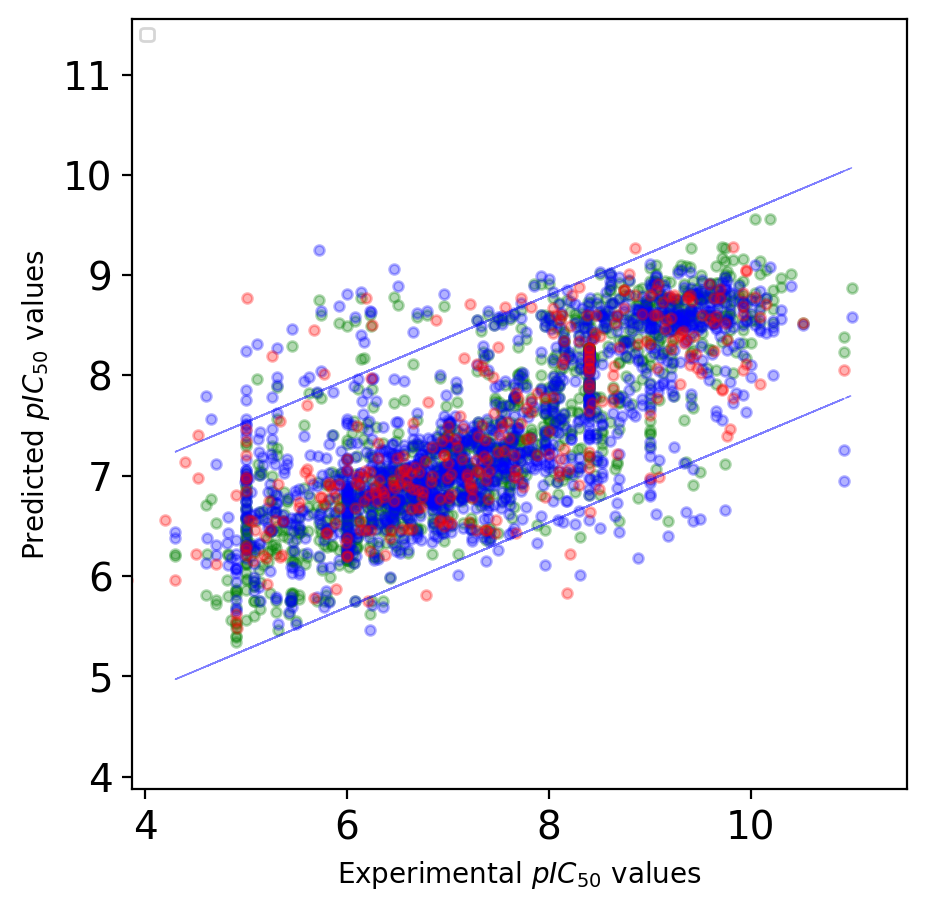

/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:74: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(Q2_CV_mean, R2_train_mean, s=100, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain, \
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


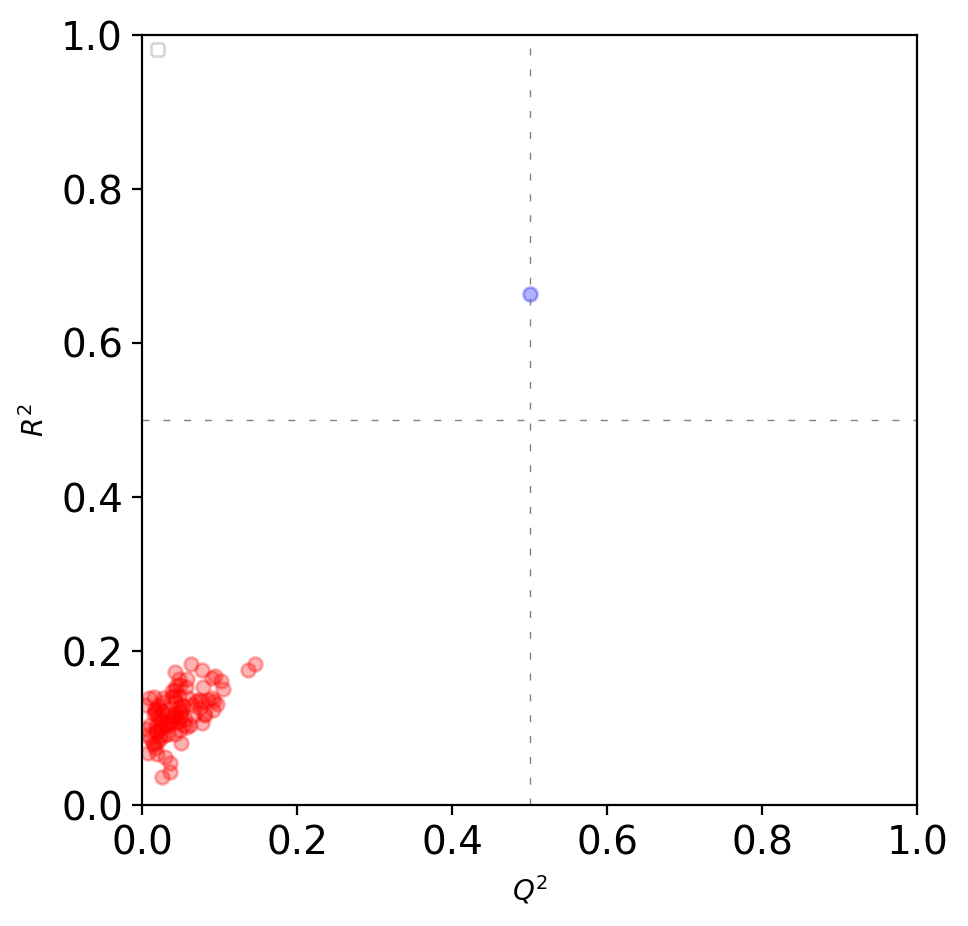

top10 ['AD2D325', 'AD2D482', 'AD2D637', 'AD2D403', 'AD2D247', 'AD2D169', 'AD2D404', 'AD2D481', 'AD2D638', 'AD2D560']

top20 ['AD2D325', 'AD2D482', 'AD2D637', 'AD2D403', 'AD2D247', 'AD2D169', 'AD2D404', 'AD2D481', 'AD2D638', 'AD2D560', 'AD2D248', 'AD2D715', 'AD2D326', 'AD2D13', 'AD2D559', 'AD2D4', 'AD2D170', 'AD2D92', 'AD2D492', 'AD2D102']

top30 ['AD2D325', 'AD2D482', 'AD2D637', 'AD2D403', 'AD2D247', 'AD2D169', 'AD2D404', 'AD2D481', 'AD2D638', 'AD2D560', 'AD2D248', 'AD2D715', 'AD2D326', 'AD2D13', 'AD2D559', 'AD2D4', 'AD2D170', 'AD2D92', 'AD2D492', 'AD2D102', 'AD2D716', 'AD2D183', 'AD2D15', 'AD2D393', 'AD2D14', 'AD2D336', 'AD2D414', 'AD2D261', 'AD2D339', 'AD2D7']

top40 ['AD2D325', 'AD2D482', 'AD2D637', 'AD2D403', 'AD2D247', 'AD2D169', 'AD2D404', 'AD2D481', 'AD2D638', 'AD2D560', 'AD2D248', 'AD2D715', 'AD2D326', 'AD2D13', 'AD2D559', 'AD2D4', 'AD2D170', 'AD2D92', 'AD2D492', 'AD2D102', 'AD2D716', 'AD2D183', 'AD2D15', 'AD2D393', 'AD2D14', 'AD2D336', 'AD2D414', 'AD2D261', 'AD2D339', 'AD2D7',

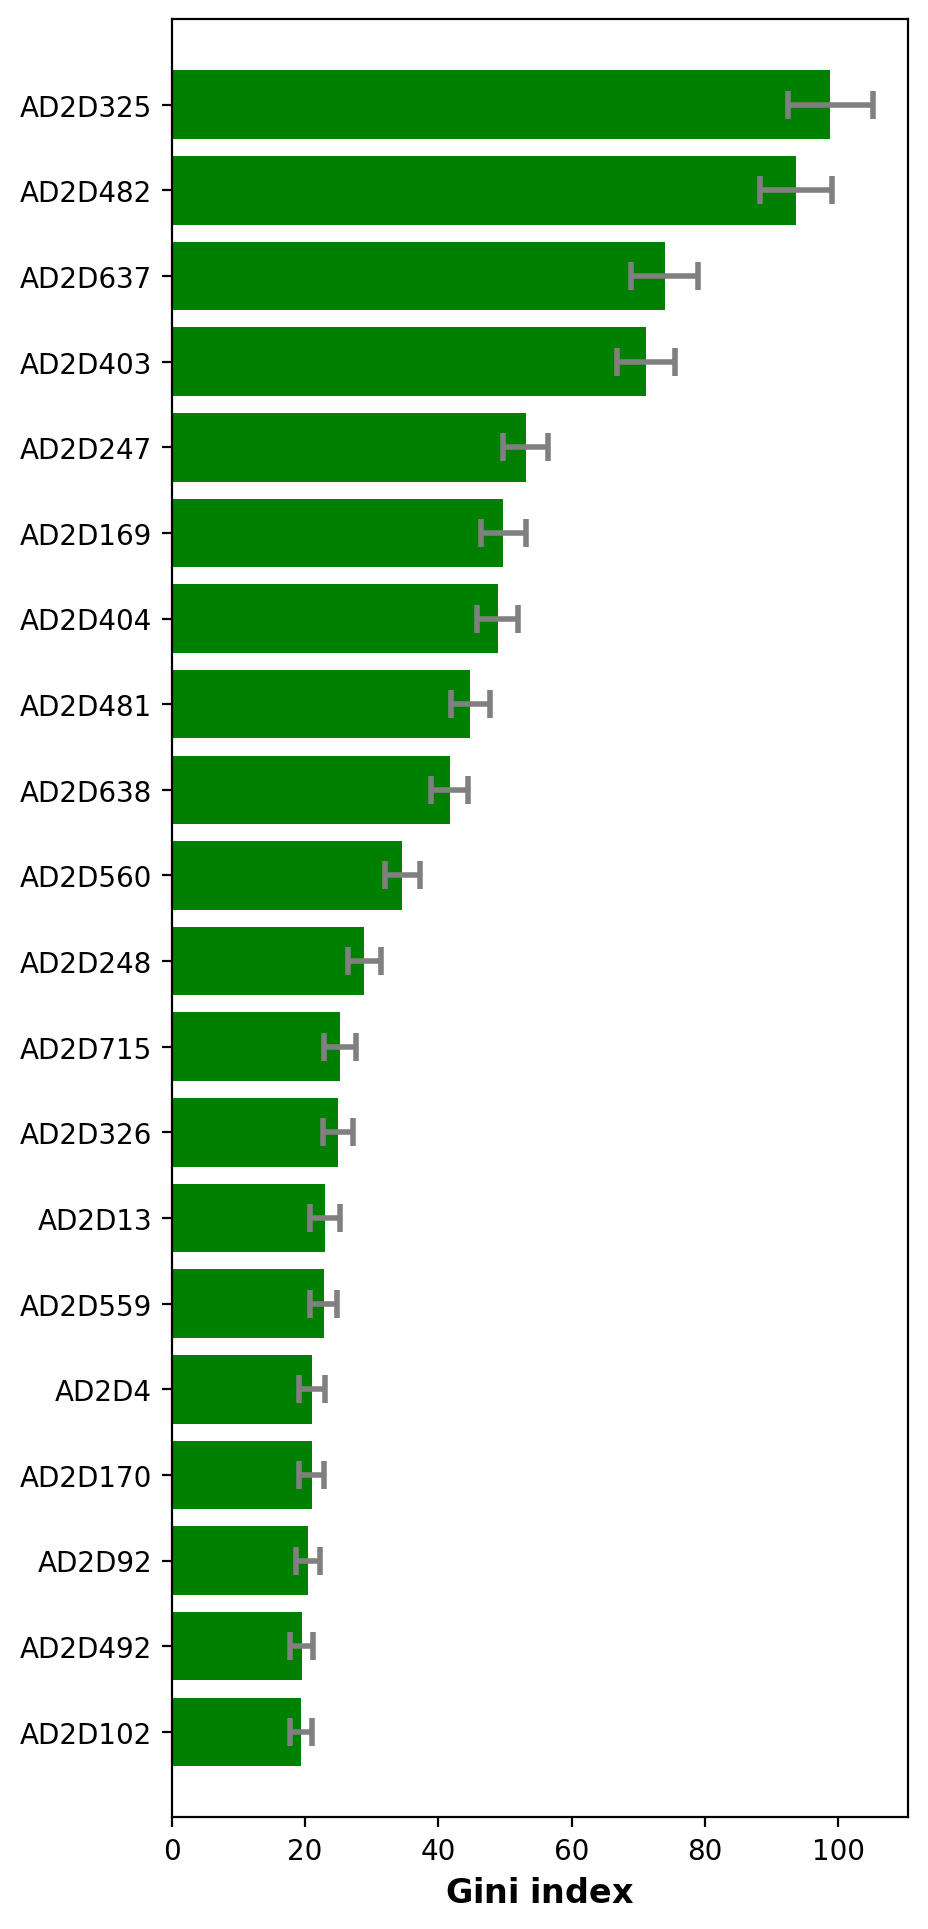



************************************************************************************

QSAR/CDKextended_Aurora.csv

from Remove useless descriptor:
The initial set of 1024 descriptors has been reduced to 996 descriptors.
from Remove correlation
The initial set of 996 descriptors has been reduced to 950 descriptors.
<_io.TextIOWrapper name='Result/Aurora_IC50_Revision.csv' mode='a' encoding='UTF-8'> ['CDKextended_Aurora.csv'],1356,1024,996,950,0.8579,0.0043,0.6211,0.0040,1356,0.6237,0.0122,0.7985,0.0059,340,0.6683,0.0346,0.5908,0.0304

Training set
------------
N: 1356
R2: 0.8579
std_R2: 0.0043
RMSE: 0.6211
std_RMSE: 0.0040

Cross-validation set
------------
N: 1356
Q2: 0.6237
std_Q2: 0.0122
RMSE: 0.7985
std_RMSE: 0.0059

External set
------------
N: 340
Q2_EXt: 0.6683
std_Q2_EXt: 0.0346
RMSE: 0.5908
std_RMSE: 0.0304


/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_train, y_train, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


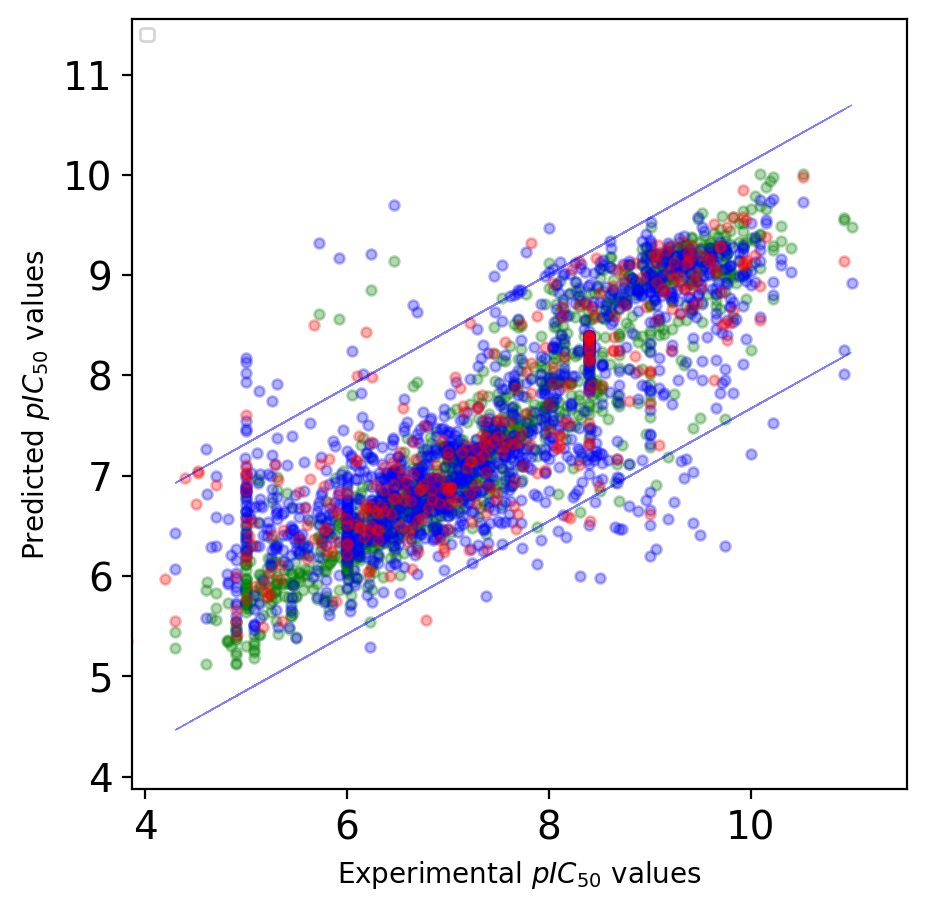

/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:74: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(Q2_CV_mean, R2_train_mean, s=100, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain, \
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


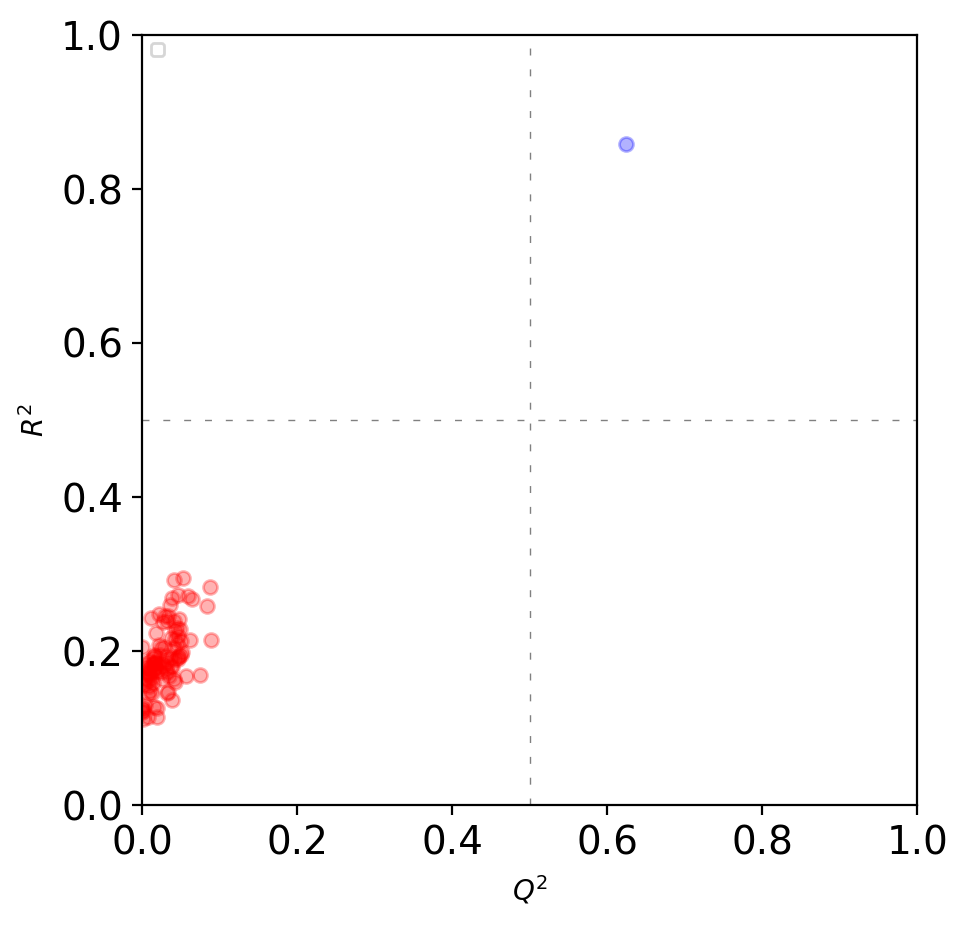

top10 ['ExtFP512', 'ExtFP463', 'ExtFP491', 'ExtFP665', 'ExtFP88', 'ExtFP20', 'ExtFP559', 'ExtFP7', 'ExtFP46', 'ExtFP44']

top20 ['ExtFP512', 'ExtFP463', 'ExtFP491', 'ExtFP665', 'ExtFP88', 'ExtFP20', 'ExtFP559', 'ExtFP7', 'ExtFP46', 'ExtFP44', 'ExtFP842', 'ExtFP764', 'ExtFP526', 'ExtFP297', 'ExtFP872', 'ExtFP569', 'ExtFP344', 'ExtFP301', 'ExtFP576', 'ExtFP110']

top30 ['ExtFP512', 'ExtFP463', 'ExtFP491', 'ExtFP665', 'ExtFP88', 'ExtFP20', 'ExtFP559', 'ExtFP7', 'ExtFP46', 'ExtFP44', 'ExtFP842', 'ExtFP764', 'ExtFP526', 'ExtFP297', 'ExtFP872', 'ExtFP569', 'ExtFP344', 'ExtFP301', 'ExtFP576', 'ExtFP110', 'ExtFP347', 'ExtFP334', 'ExtFP567', 'ExtFP570', 'ExtFP631', 'ExtFP348', 'ExtFP734', 'ExtFP1013', 'ExtFP883', 'ExtFP315']

top40 ['ExtFP512', 'ExtFP463', 'ExtFP491', 'ExtFP665', 'ExtFP88', 'ExtFP20', 'ExtFP559', 'ExtFP7', 'ExtFP46', 'ExtFP44', 'ExtFP842', 'ExtFP764', 'ExtFP526', 'ExtFP297', 'ExtFP872', 'ExtFP569', 'ExtFP344', 'ExtFP301', 'ExtFP576', 'ExtFP110', 'ExtFP347', 'ExtFP334', 'ExtFP56

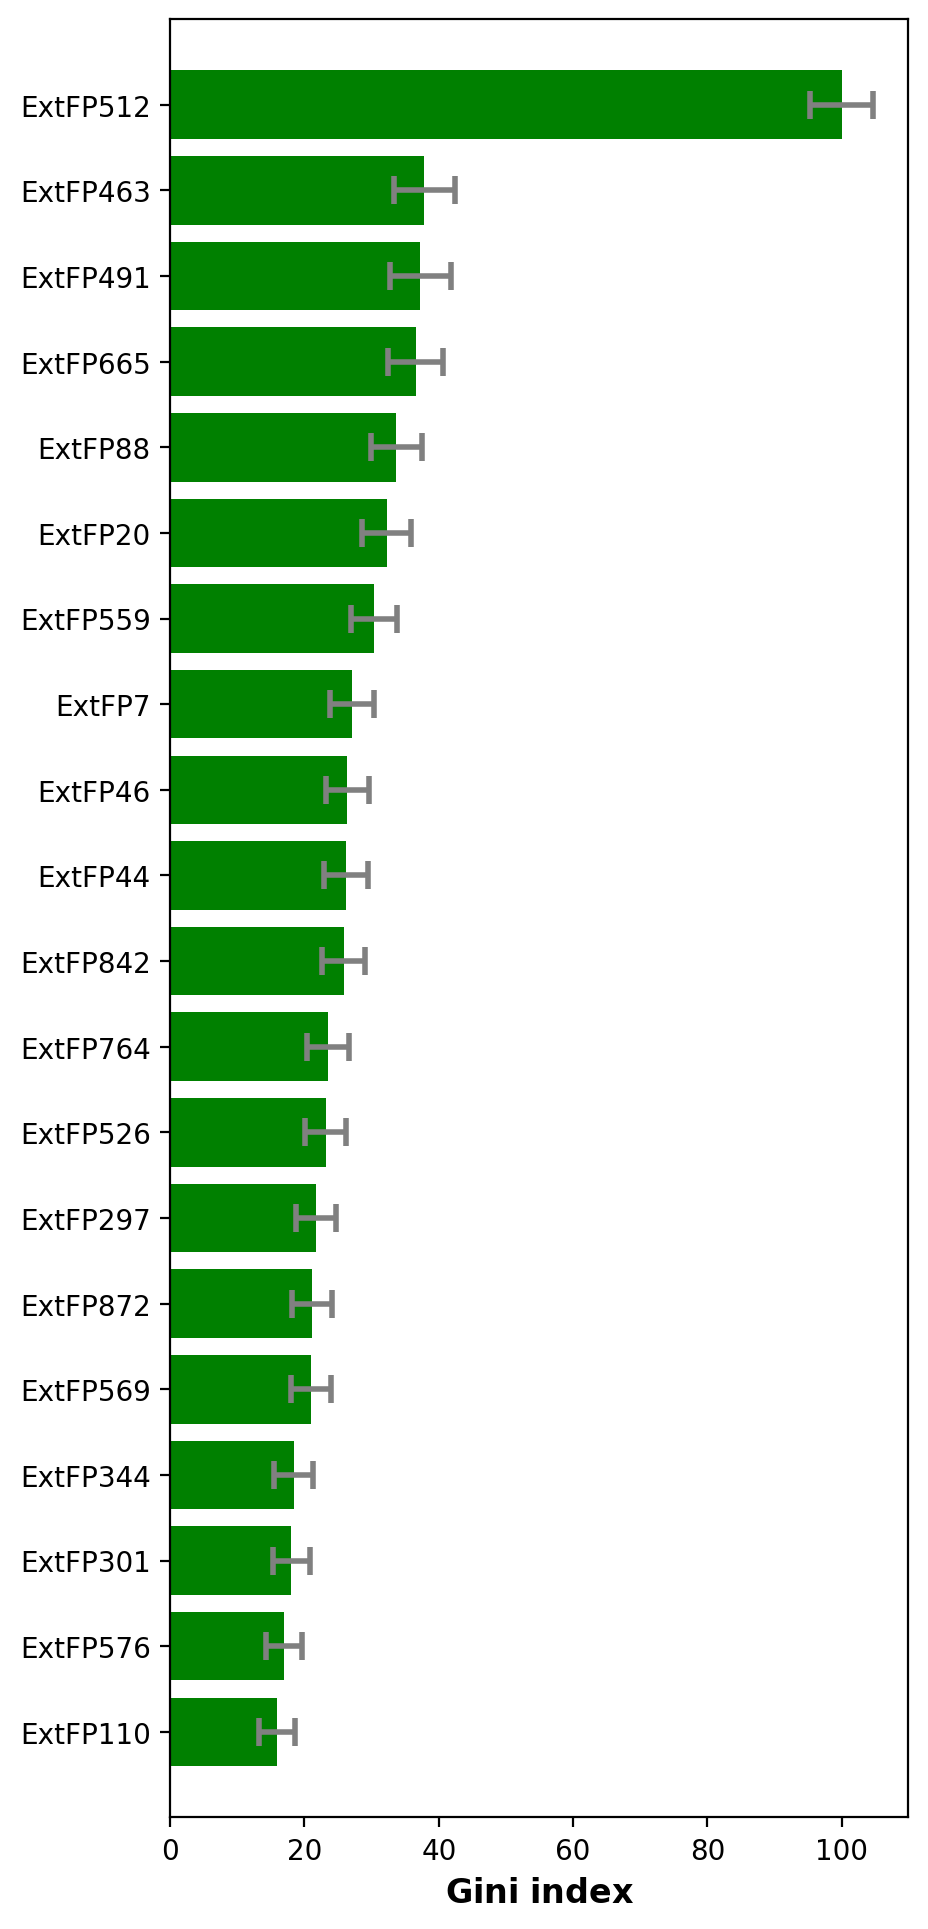



************************************************************************************

QSAR/CDKgraphOnly_Aurora.csv

from Remove useless descriptor:
The initial set of 1024 descriptors has been reduced to 944 descriptors.
from Remove correlation
The initial set of 944 descriptors has been reduced to 556 descriptors.
<_io.TextIOWrapper name='Result/Aurora_IC50_Revision.csv' mode='a' encoding='UTF-8'> ['CDKgraphOnly_Aurora.csv'],1356,1024,944,556,0.7892,0.0044,0.6918,0.0037,1356,0.5953,0.0096,0.8182,0.0050,340,0.6346,0.0324,0.6235,0.0350

Training set
------------
N: 1356
R2: 0.7892
std_R2: 0.0044
RMSE: 0.6918
std_RMSE: 0.0037

Cross-validation set
------------
N: 1356
Q2: 0.5953
std_Q2: 0.0096
RMSE: 0.8182
std_RMSE: 0.0050

External set
------------
N: 340
Q2_EXt: 0.6346
std_Q2_EXt: 0.0324
RMSE: 0.6235
std_RMSE: 0.0350


/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_train, y_train, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


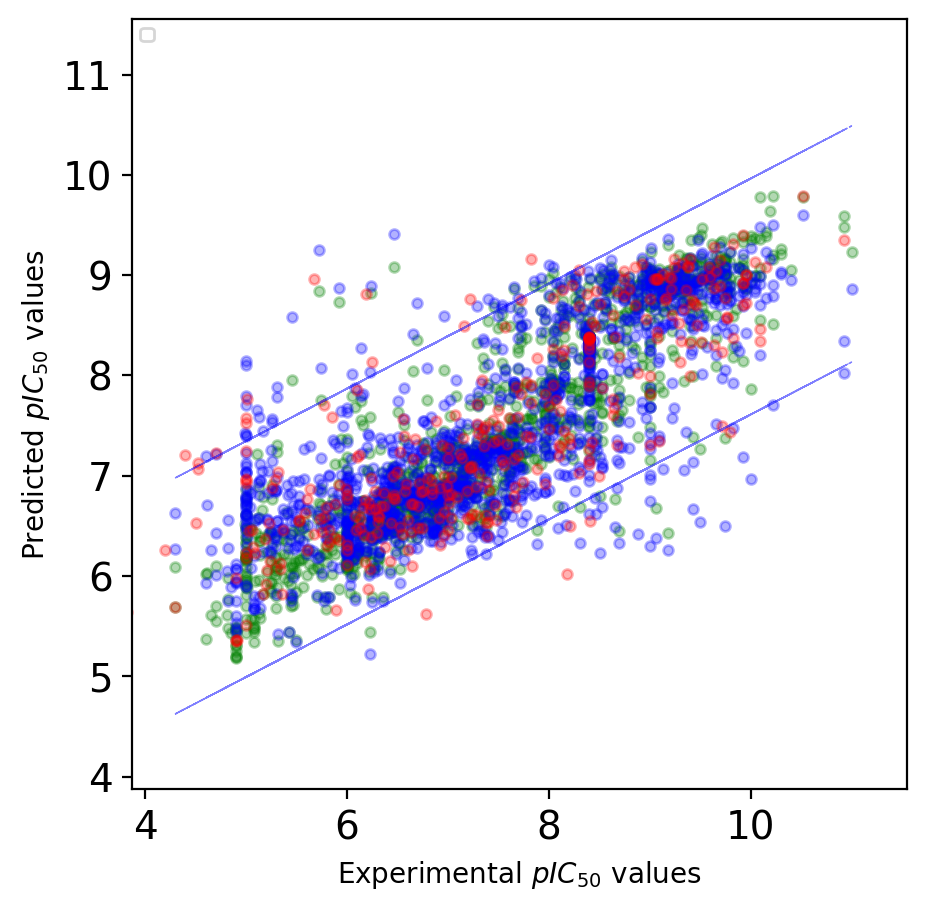

/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:74: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(Q2_CV_mean, R2_train_mean, s=100, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain, \
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


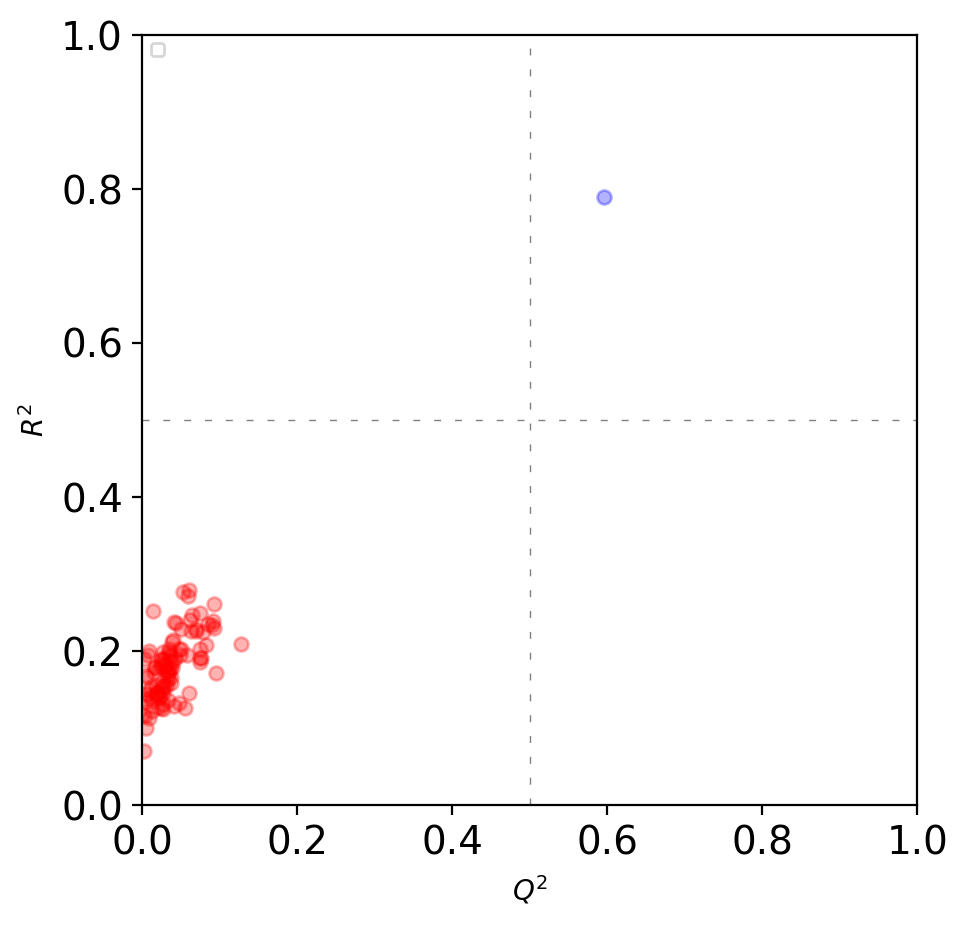

top10 ['GraphFP270', 'GraphFP73', 'GraphFP913', 'GraphFP125', 'GraphFP836', 'GraphFP277', 'GraphFP217', 'GraphFP529', 'GraphFP725', 'GraphFP481']

top20 ['GraphFP270', 'GraphFP73', 'GraphFP913', 'GraphFP125', 'GraphFP836', 'GraphFP277', 'GraphFP217', 'GraphFP529', 'GraphFP725', 'GraphFP481', 'GraphFP34', 'GraphFP785', 'GraphFP136', 'GraphFP909', 'GraphFP228', 'GraphFP726', 'GraphFP886', 'GraphFP837', 'GraphFP164', 'GraphFP108']

top30 ['GraphFP270', 'GraphFP73', 'GraphFP913', 'GraphFP125', 'GraphFP836', 'GraphFP277', 'GraphFP217', 'GraphFP529', 'GraphFP725', 'GraphFP481', 'GraphFP34', 'GraphFP785', 'GraphFP136', 'GraphFP909', 'GraphFP228', 'GraphFP726', 'GraphFP886', 'GraphFP837', 'GraphFP164', 'GraphFP108', 'GraphFP767', 'GraphFP144', 'GraphFP276', 'GraphFP1001', 'GraphFP775', 'GraphFP319', 'GraphFP607', 'GraphFP278', 'GraphFP838', 'GraphFP835']

top40 ['GraphFP270', 'GraphFP73', 'GraphFP913', 'GraphFP125', 'GraphFP836', 'GraphFP277', 'GraphFP217', 'GraphFP529', 'GraphFP725', 'GraphFP

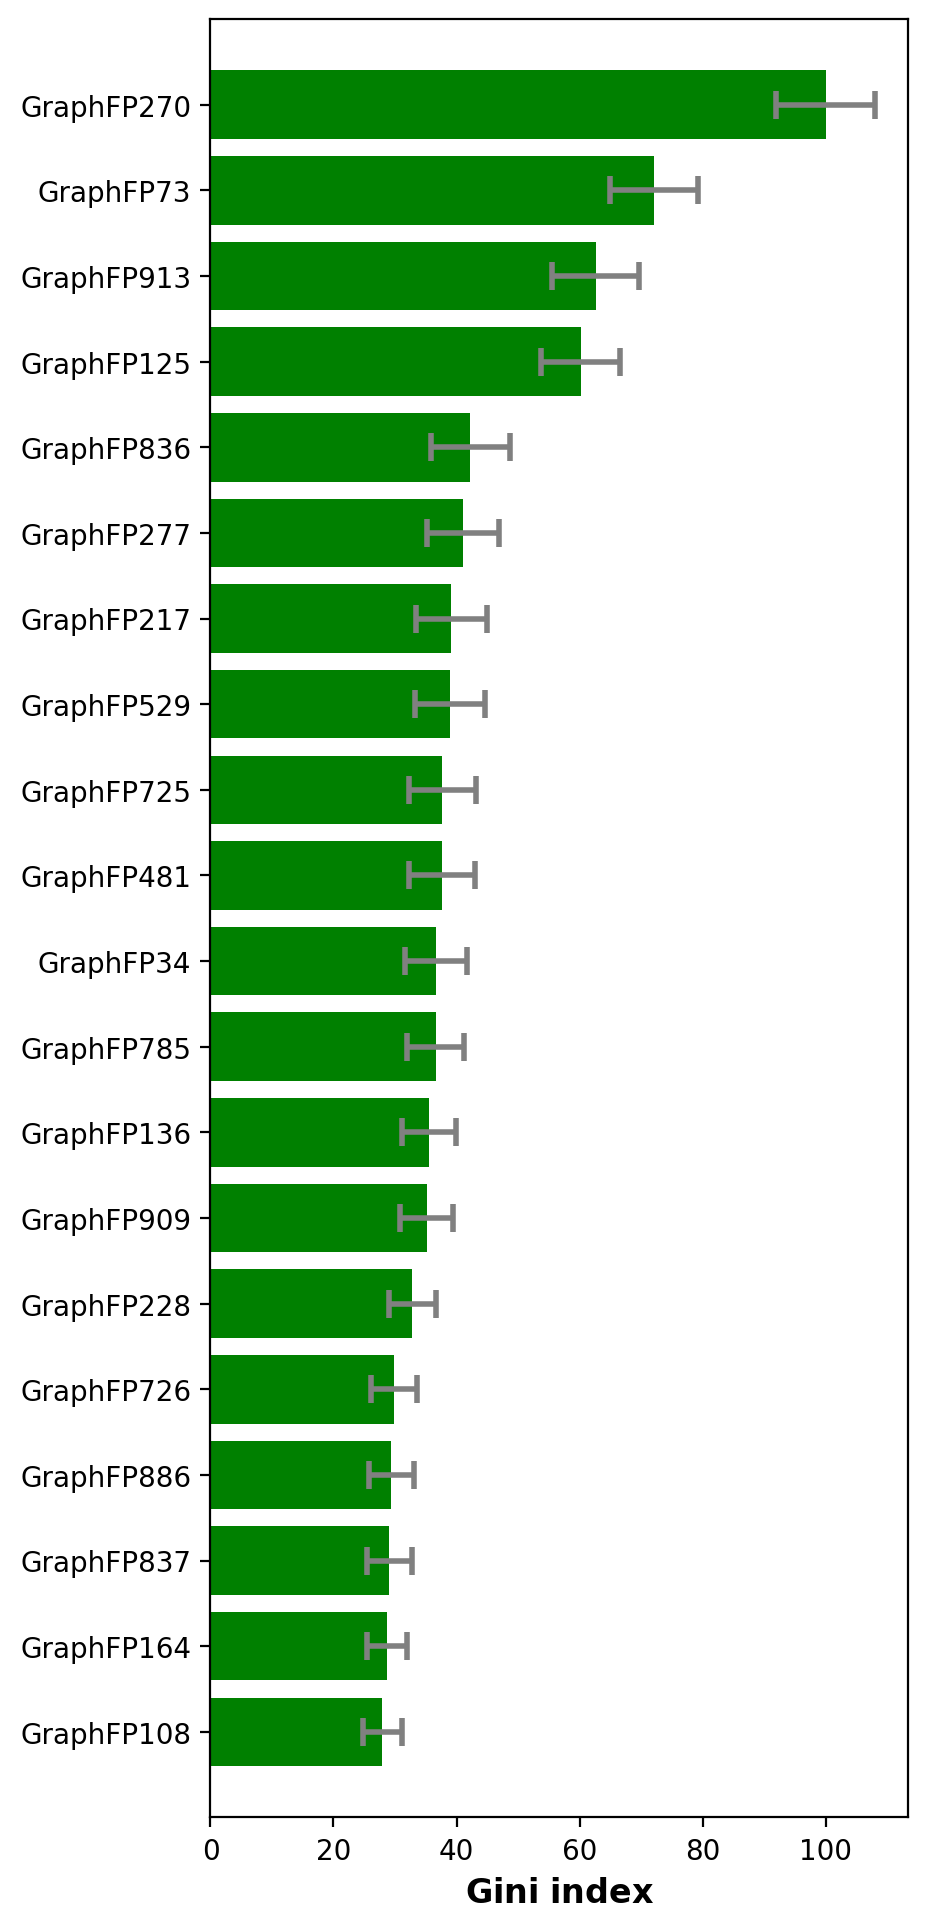



************************************************************************************

QSAR/MACCS_Aurora.csv

from Remove useless descriptor:
The initial set of 166 descriptors has been reduced to 130 descriptors.
from Remove correlation
The initial set of 130 descriptors has been reduced to 86 descriptors.
<_io.TextIOWrapper name='Result/Aurora_IC50_Revision.csv' mode='a' encoding='UTF-8'> ['MACCS_Aurora.csv'],1356,166,130,86,0.7487,0.0051,0.7345,0.0049,1356,0.5335,0.0113,0.8612,0.0064,340,0.5535,0.0282,0.7079,0.0352

Training set
------------
N: 1356
R2: 0.7487
std_R2: 0.0051
RMSE: 0.7345
std_RMSE: 0.0049

Cross-validation set
------------
N: 1356
Q2: 0.5335
std_Q2: 0.0113
RMSE: 0.8612
std_RMSE: 0.0064

External set
------------
N: 340
Q2_EXt: 0.5535
std_Q2_EXt: 0.0282
RMSE: 0.7079
std_RMSE: 0.0352


/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_train, y_train, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


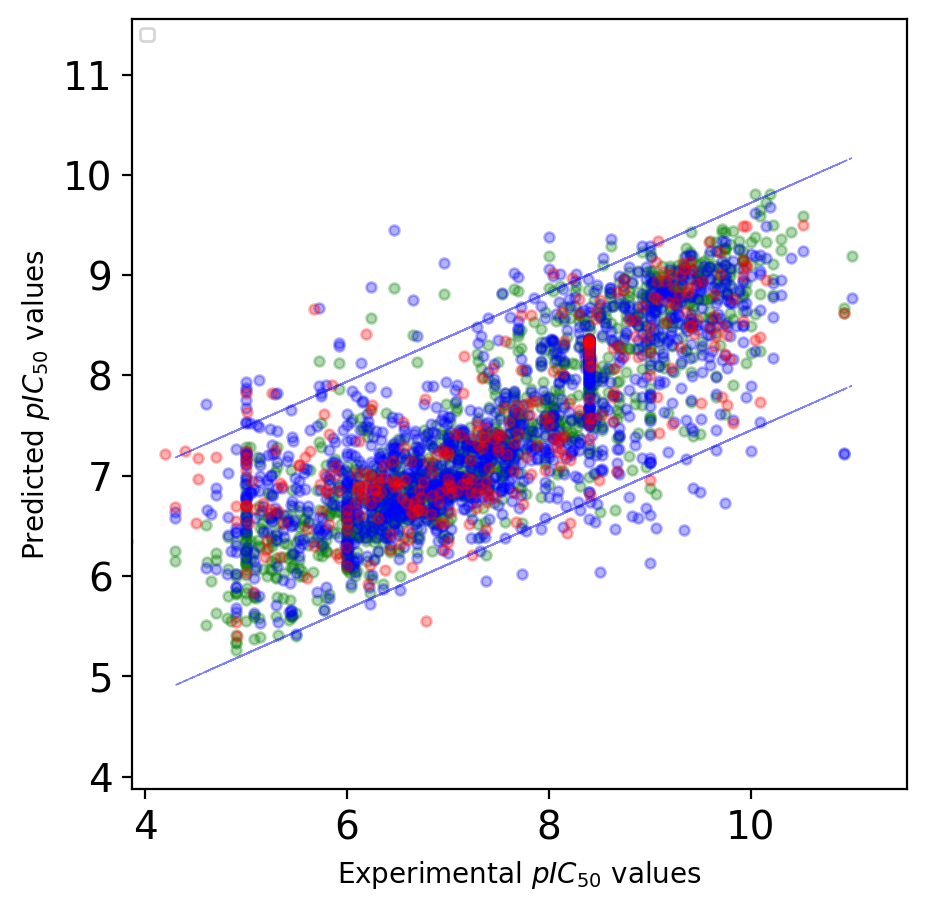

/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:74: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(Q2_CV_mean, R2_train_mean, s=100, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain, \
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


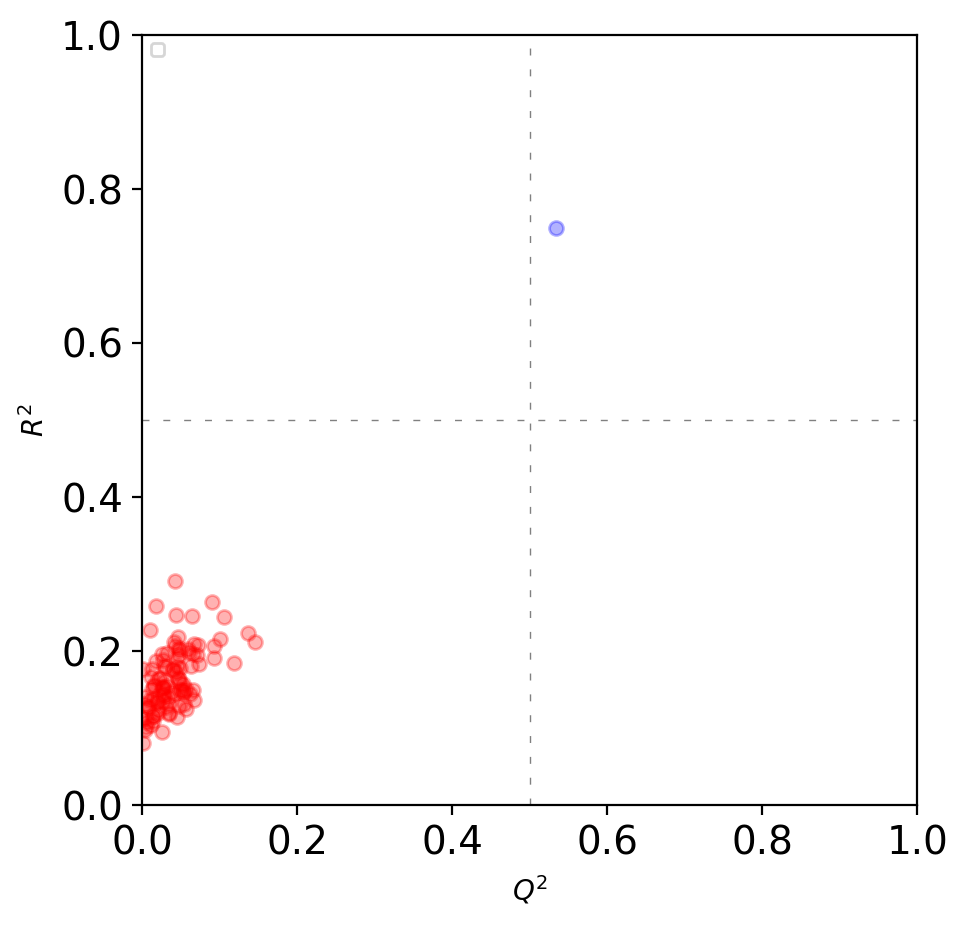

top10 ['MACCSFP136', 'MACCSFP91', 'MACCSFP84', 'MACCSFP106', 'MACCSFP104', 'MACCSFP37', 'MACCSFP160', 'MACCSFP159', 'MACCSFP82', 'MACCSFP16']

top20 ['MACCSFP136', 'MACCSFP91', 'MACCSFP84', 'MACCSFP106', 'MACCSFP104', 'MACCSFP37', 'MACCSFP160', 'MACCSFP159', 'MACCSFP82', 'MACCSFP16', 'MACCSFP80', 'MACCSFP79', 'MACCSFP131', 'MACCSFP87', 'MACCSFP38', 'MACCSFP66', 'MACCSFP105', 'MACCSFP112', 'MACCSFP100', 'MACCSFP98']

top30 ['MACCSFP136', 'MACCSFP91', 'MACCSFP84', 'MACCSFP106', 'MACCSFP104', 'MACCSFP37', 'MACCSFP160', 'MACCSFP159', 'MACCSFP82', 'MACCSFP16', 'MACCSFP80', 'MACCSFP79', 'MACCSFP131', 'MACCSFP87', 'MACCSFP38', 'MACCSFP66', 'MACCSFP105', 'MACCSFP112', 'MACCSFP100', 'MACCSFP98', 'MACCSFP53', 'MACCSFP97', 'MACCSFP128', 'MACCSFP42', 'MACCSFP155', 'MACCSFP83', 'MACCSFP144', 'MACCSFP111', 'MACCSFP85', 'MACCSFP146']

top40 ['MACCSFP136', 'MACCSFP91', 'MACCSFP84', 'MACCSFP106', 'MACCSFP104', 'MACCSFP37', 'MACCSFP160', 'MACCSFP159', 'MACCSFP82', 'MACCSFP16', 'MACCSFP80', 'MACCSFP79', 

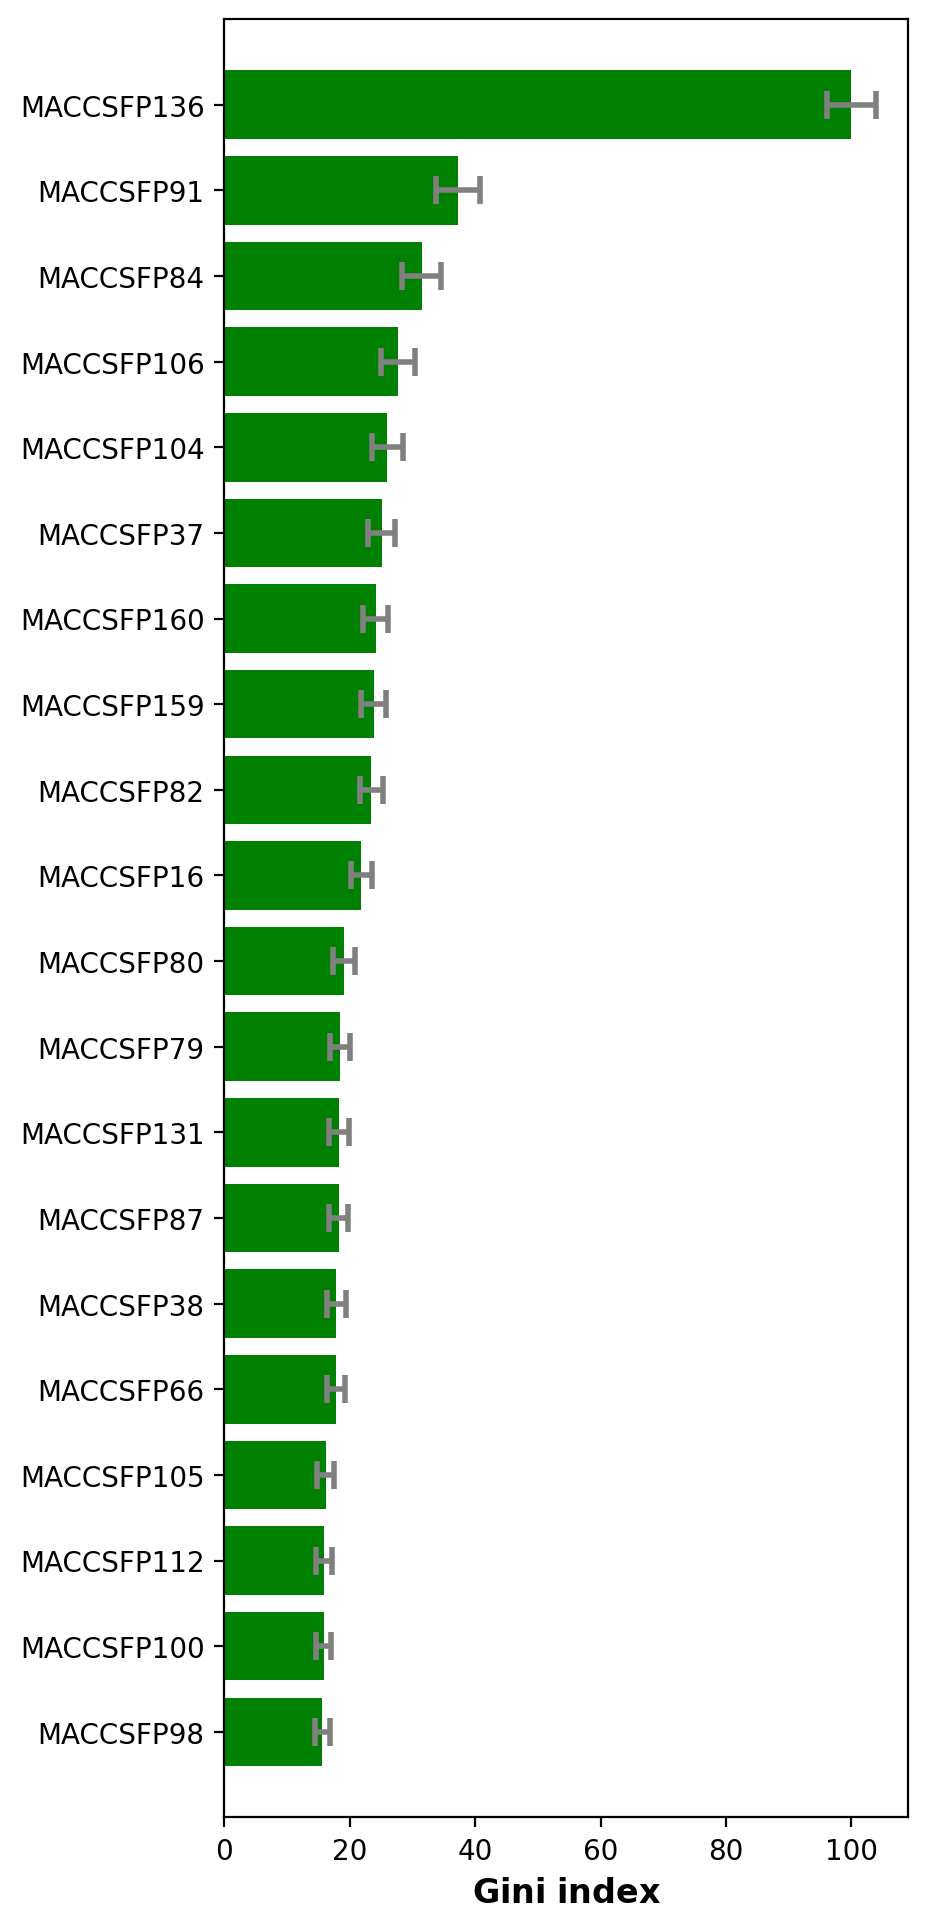



************************************************************************************

QSAR/AtomPairs2DCount_Aurora.csv

from Remove useless descriptor:
The initial set of 780 descriptors has been reduced to 221 descriptors.
from Remove correlation
The initial set of 221 descriptors has been reduced to 107 descriptors.
<_io.TextIOWrapper name='Result/Aurora_IC50_Revision.csv' mode='a' encoding='UTF-8'> ['AtomPairs2DCount_Aurora.csv'],1356,780,221,107,0.7897,0.0054,0.6937,0.0042,1356,0.5850,0.0116,0.8251,0.0048,340,0.6198,0.0387,0.6427,0.0335

Training set
------------
N: 1356
R2: 0.7897
std_R2: 0.0054
RMSE: 0.6937
std_RMSE: 0.0042

Cross-validation set
------------
N: 1356
Q2: 0.5850
std_Q2: 0.0116
RMSE: 0.8251
std_RMSE: 0.0048

External set
------------
N: 340
Q2_EXt: 0.6198
std_Q2_EXt: 0.0387
RMSE: 0.6427
std_RMSE: 0.0335


/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_train, y_train, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


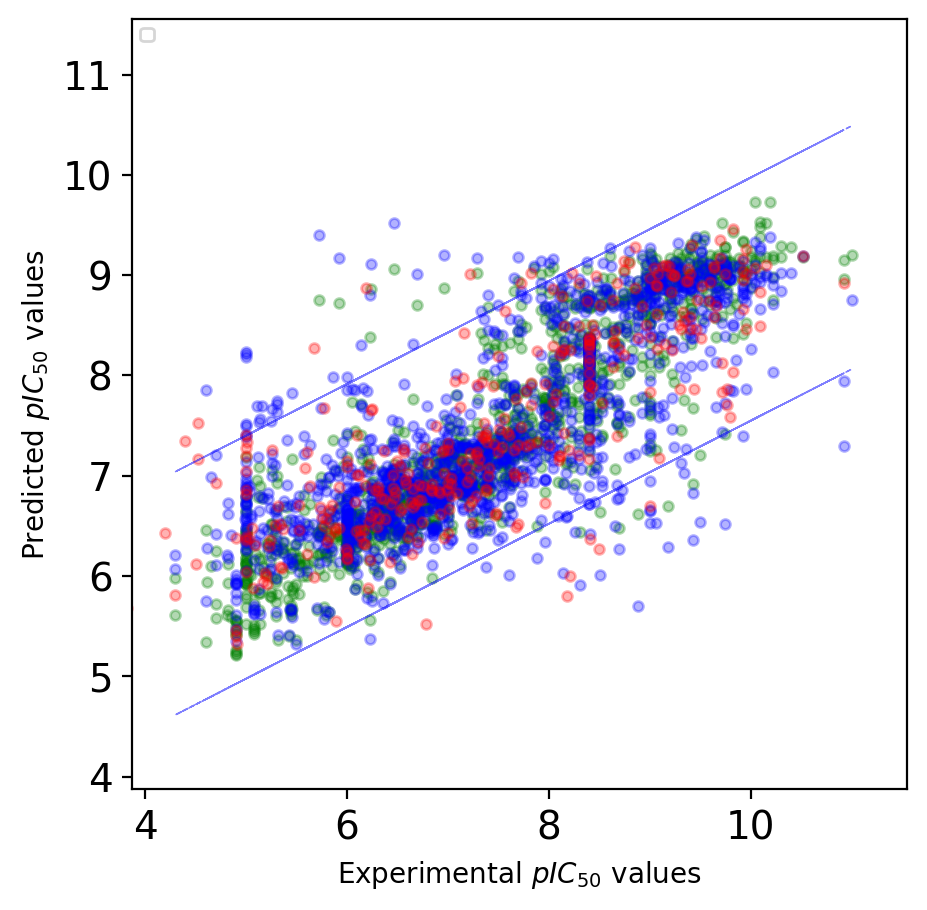

/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:74: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(Q2_CV_mean, R2_train_mean, s=100, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain, \
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


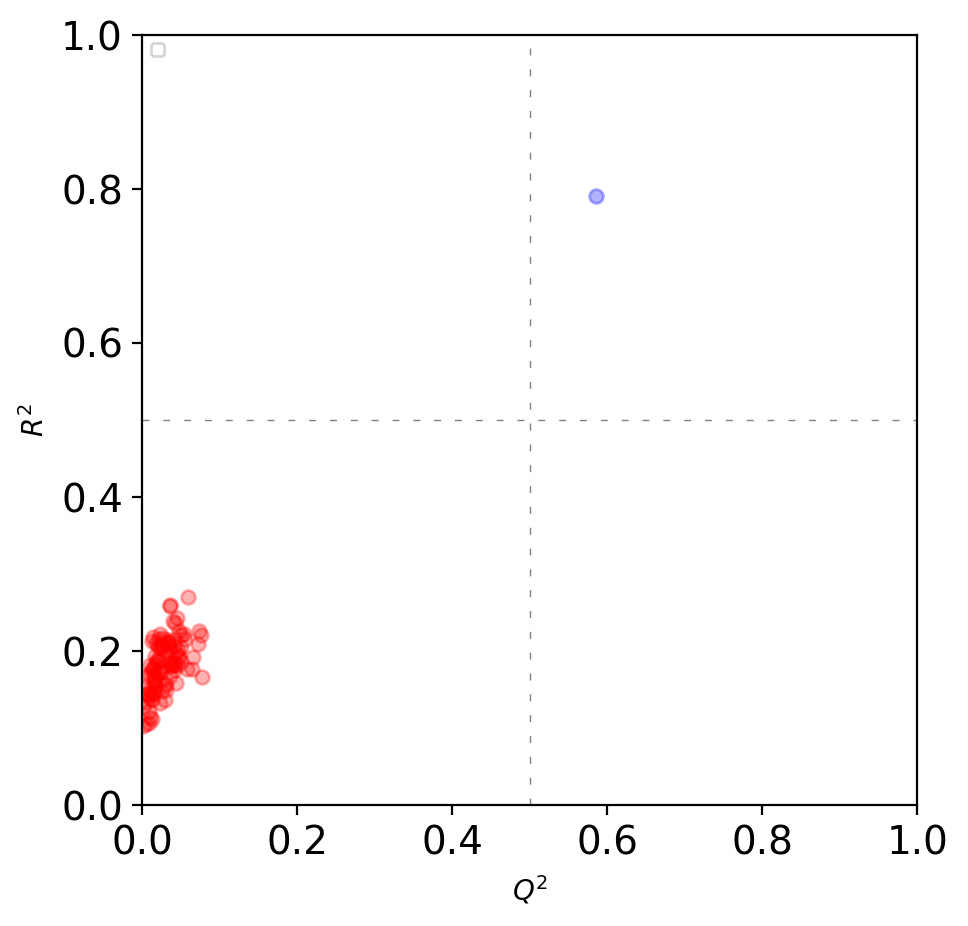

top10 ['APC2D3_C_N', 'APC2D1_C_C', 'APC2D8_C_N', 'APC2D1_C_N', 'APC2D5_N_N', 'APC2D2_N_O', 'APC2D4_N_N', 'APC2D2_N_N', 'APC2D7_N_O', 'APC2D5_C_N']

top20 ['APC2D3_C_N', 'APC2D1_C_C', 'APC2D8_C_N', 'APC2D1_C_N', 'APC2D5_N_N', 'APC2D2_N_O', 'APC2D4_N_N', 'APC2D2_N_N', 'APC2D7_N_O', 'APC2D5_C_N', 'APC2D9_N_N', 'APC2D6_N_O', 'APC2D6_N_N', 'APC2D4_N_O', 'APC2D1_C_O', 'APC2D9_N_O', 'APC2D8_N_O', 'APC2D8_N_N', 'APC2D1_N_N', 'APC2D10_N_N']

top30 ['APC2D3_C_N', 'APC2D1_C_C', 'APC2D8_C_N', 'APC2D1_C_N', 'APC2D5_N_N', 'APC2D2_N_O', 'APC2D4_N_N', 'APC2D2_N_N', 'APC2D7_N_O', 'APC2D5_C_N', 'APC2D9_N_N', 'APC2D6_N_O', 'APC2D6_N_N', 'APC2D4_N_O', 'APC2D1_C_O', 'APC2D9_N_O', 'APC2D8_N_O', 'APC2D8_N_N', 'APC2D1_N_N', 'APC2D10_N_N', 'APC2D5_N_O', 'APC2D10_N_O', 'APC2D9_N_F', 'APC2D1_C_F', 'APC2D1_C_S', 'APC2D3_O_F', 'APC2D3_N_O', 'APC2D10_O_Cl', 'APC2D1_N_S', 'APC2D5_N_F']

top40 ['APC2D3_C_N', 'APC2D1_C_C', 'APC2D8_C_N', 'APC2D1_C_N', 'APC2D5_N_N', 'APC2D2_N_O', 'APC2D4_N_N', 'APC2D2_N_N', 'APC2D7_N_O'

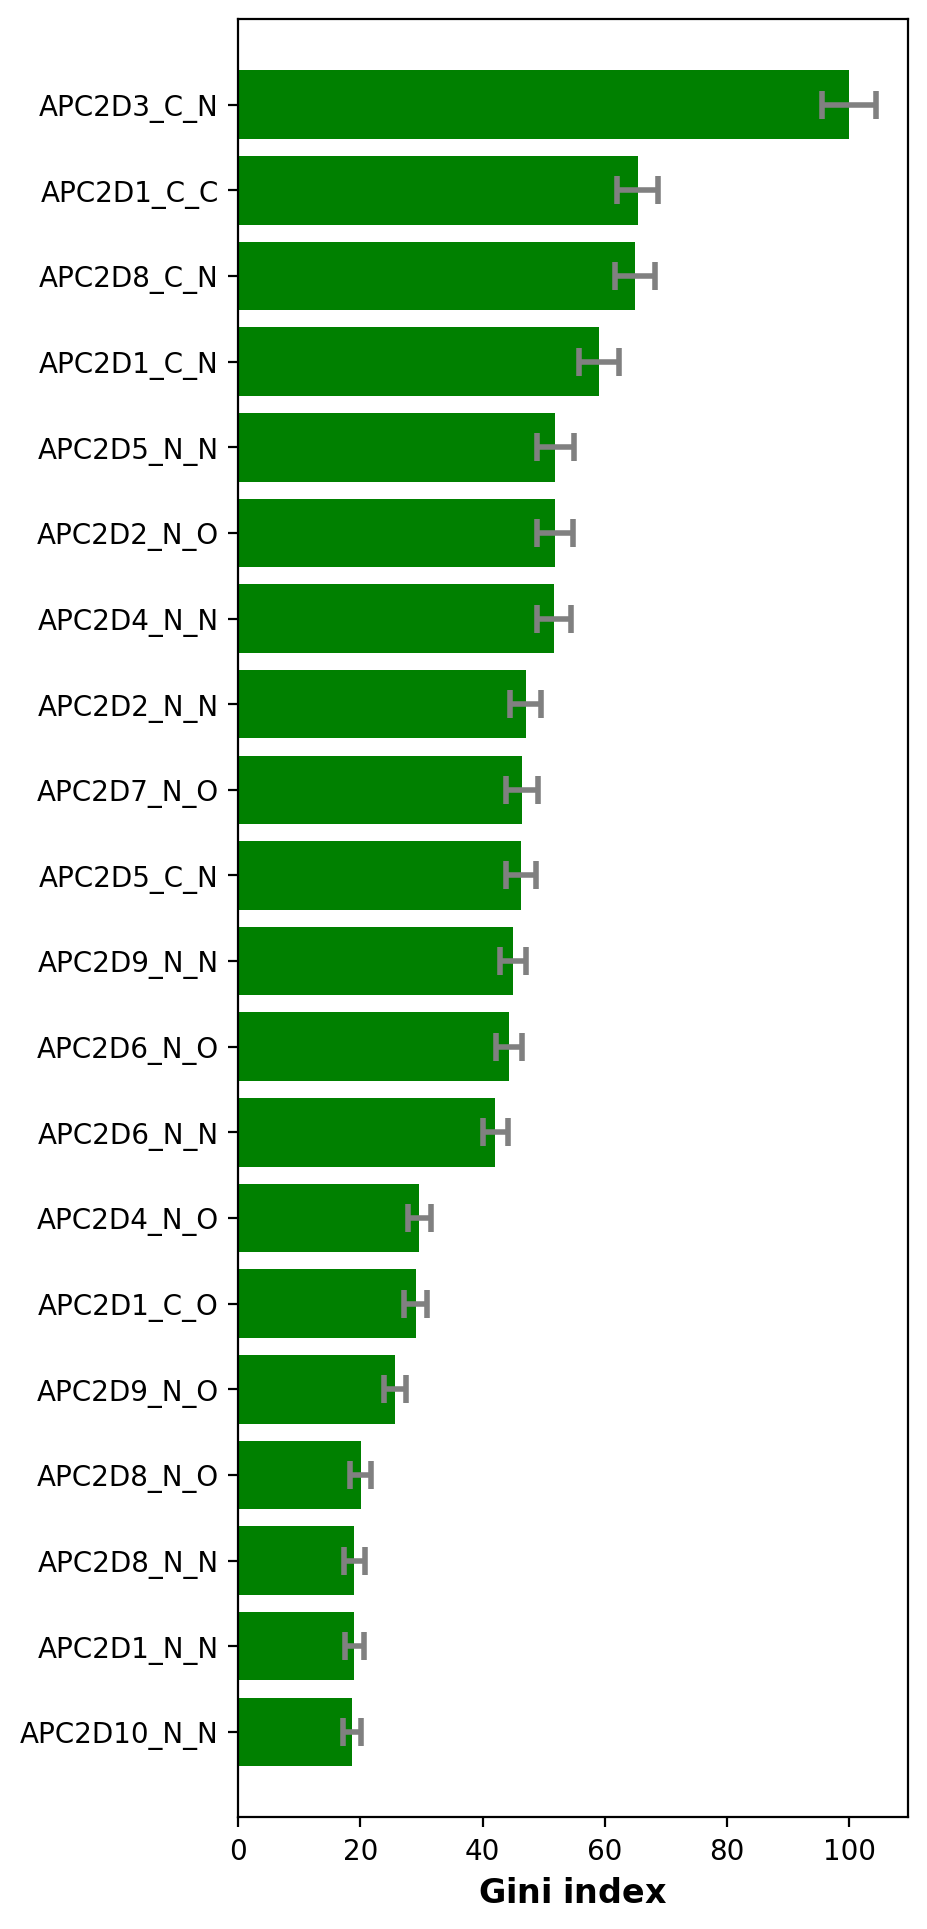



************************************************************************************

QSAR/KlekotaRothCount_Aurora.csv

from Remove useless descriptor:
The initial set of 4860 descriptors has been reduced to 726 descriptors.
from Remove correlation
The initial set of 726 descriptors has been reduced to 387 descriptors.
<_io.TextIOWrapper name='Result/Aurora_IC50_Revision.csv' mode='a' encoding='UTF-8'> ['KlekotaRothCount_Aurora.csv'],1356,4860,726,387,0.6948,0.0075,0.7790,0.0058,1356,0.5495,0.0107,0.8580,0.0063,340,0.5794,0.0291,0.6959,0.0391

Training set
------------
N: 1356
R2: 0.6948
std_R2: 0.0075
RMSE: 0.7790
std_RMSE: 0.0058

Cross-validation set
------------
N: 1356
Q2: 0.5495
std_Q2: 0.0107
RMSE: 0.8580
std_RMSE: 0.0063

External set
------------
N: 340
Q2_EXt: 0.5794
std_Q2_EXt: 0.0291
RMSE: 0.6959
std_RMSE: 0.0391


/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_train, y_train, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


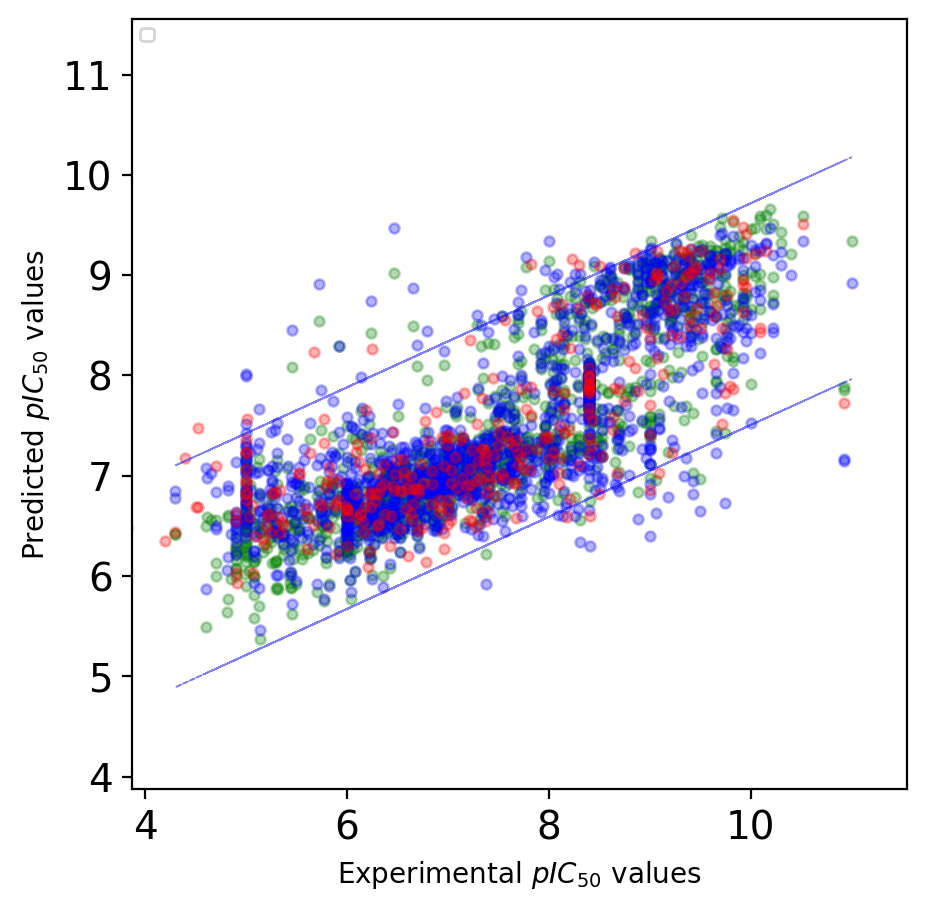

/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:74: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(Q2_CV_mean, R2_train_mean, s=100, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain, \
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


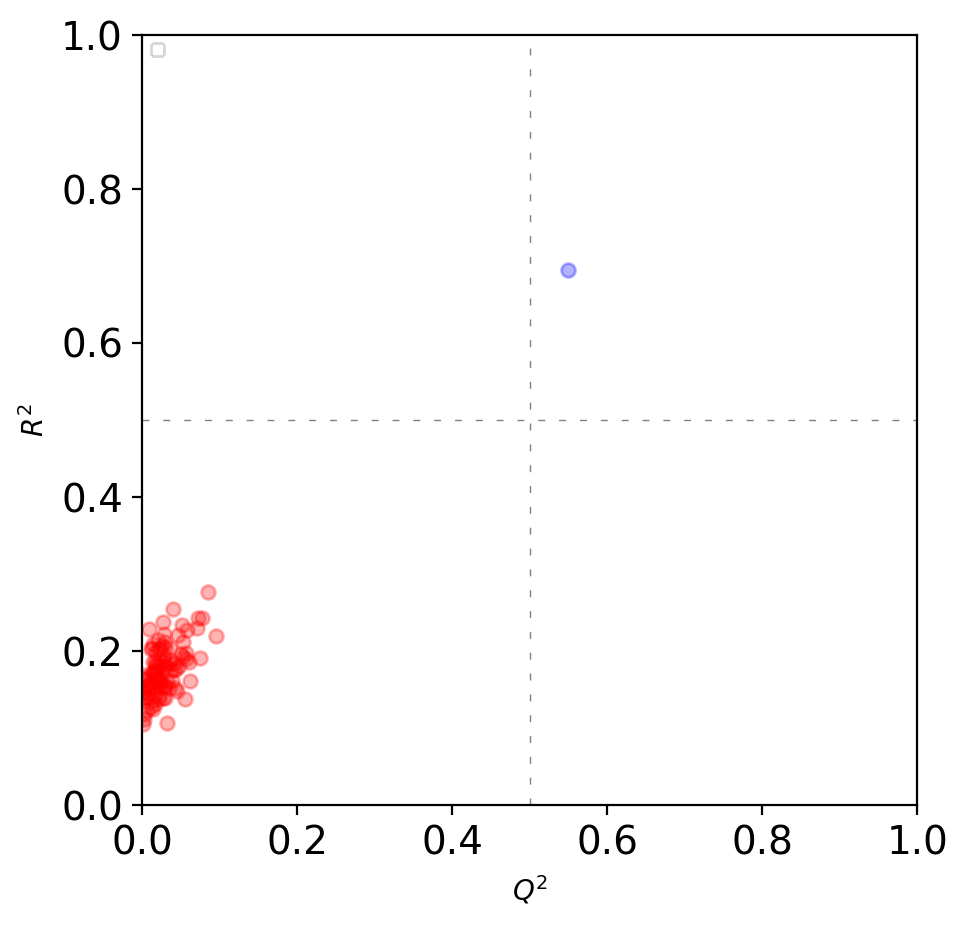

top10 ['KRFPC992', 'KRFPC1193', 'KRFPC993', 'KRFPC1592', 'KRFPC839', 'KRFPC3943', 'KRFPC2137', 'KRFPC677', 'KRFPC3180', 'KRFPC1146']

top20 ['KRFPC992', 'KRFPC1193', 'KRFPC993', 'KRFPC1592', 'KRFPC839', 'KRFPC3943', 'KRFPC2137', 'KRFPC677', 'KRFPC3180', 'KRFPC1146', 'KRFPC4269', 'KRFPC297', 'KRFPC1564', 'KRFPC4331', 'KRFPC678', 'KRFPC3058', 'KRFPC998', 'KRFPC683', 'KRFPC669', 'KRFPC2026']

top30 ['KRFPC992', 'KRFPC1193', 'KRFPC993', 'KRFPC1592', 'KRFPC839', 'KRFPC3943', 'KRFPC2137', 'KRFPC677', 'KRFPC3180', 'KRFPC1146', 'KRFPC4269', 'KRFPC297', 'KRFPC1564', 'KRFPC4331', 'KRFPC678', 'KRFPC3058', 'KRFPC998', 'KRFPC683', 'KRFPC669', 'KRFPC2026', 'KRFPC1', 'KRFPC3169', 'KRFPC467', 'KRFPC3013', 'KRFPC3682', 'KRFPC3608', 'KRFPC1154', 'KRFPC1594', 'KRFPC2547', 'KRFPC298']

top40 ['KRFPC992', 'KRFPC1193', 'KRFPC993', 'KRFPC1592', 'KRFPC839', 'KRFPC3943', 'KRFPC2137', 'KRFPC677', 'KRFPC3180', 'KRFPC1146', 'KRFPC4269', 'KRFPC297', 'KRFPC1564', 'KRFPC4331', 'KRFPC678', 'KRFPC3058', 'KRFPC998', 'K

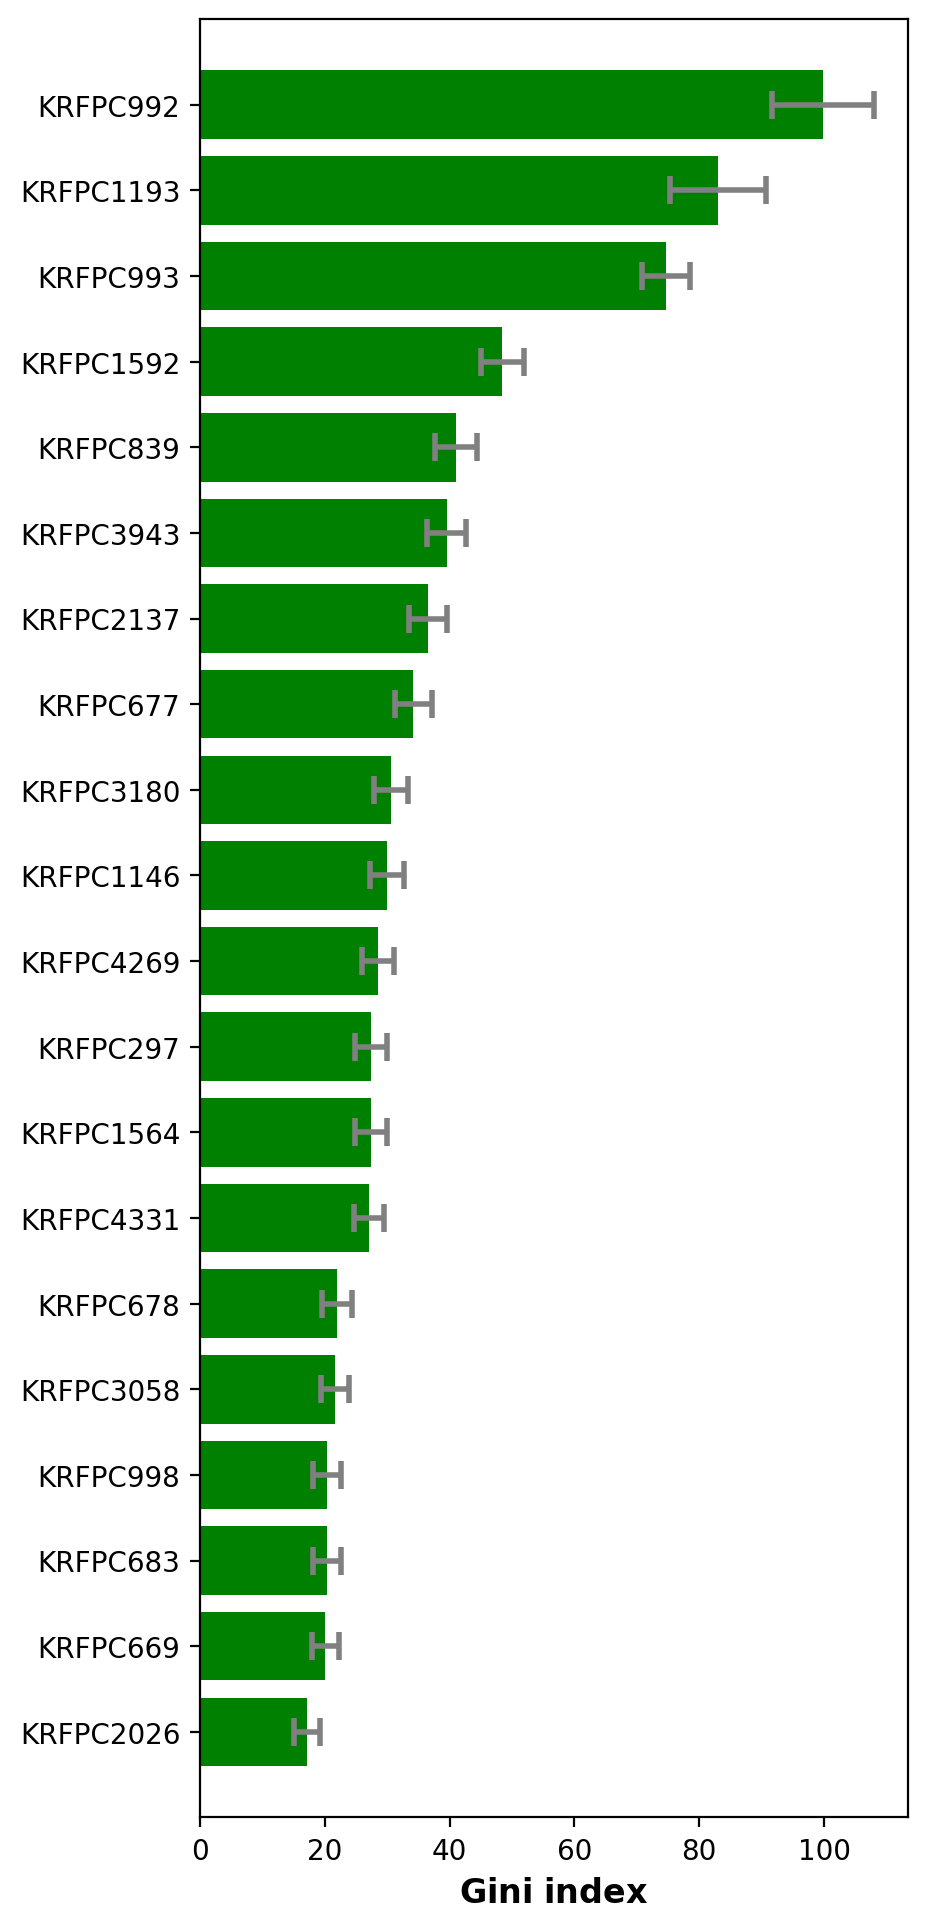



************************************************************************************

QSAR/PubChem_Aurora.csv

from Remove useless descriptor:
The initial set of 881 descriptors has been reduced to 471 descriptors.
from Remove correlation
The initial set of 471 descriptors has been reduced to 173 descriptors.
<_io.TextIOWrapper name='Result/Aurora_IC50_Revision.csv' mode='a' encoding='UTF-8'> ['PubChem_Aurora.csv'],1356,881,471,173,0.7427,0.0066,0.7355,0.0046,1356,0.5672,0.0130,0.8389,0.0062,340,0.5926,0.0399,0.6645,0.0401

Training set
------------
N: 1356
R2: 0.7427
std_R2: 0.0066
RMSE: 0.7355
std_RMSE: 0.0046

Cross-validation set
------------
N: 1356
Q2: 0.5672
std_Q2: 0.0130
RMSE: 0.8389
std_RMSE: 0.0062

External set
------------
N: 340
Q2_EXt: 0.5926
std_Q2_EXt: 0.0399
RMSE: 0.6645
std_RMSE: 0.0401


/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_train, y_train, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


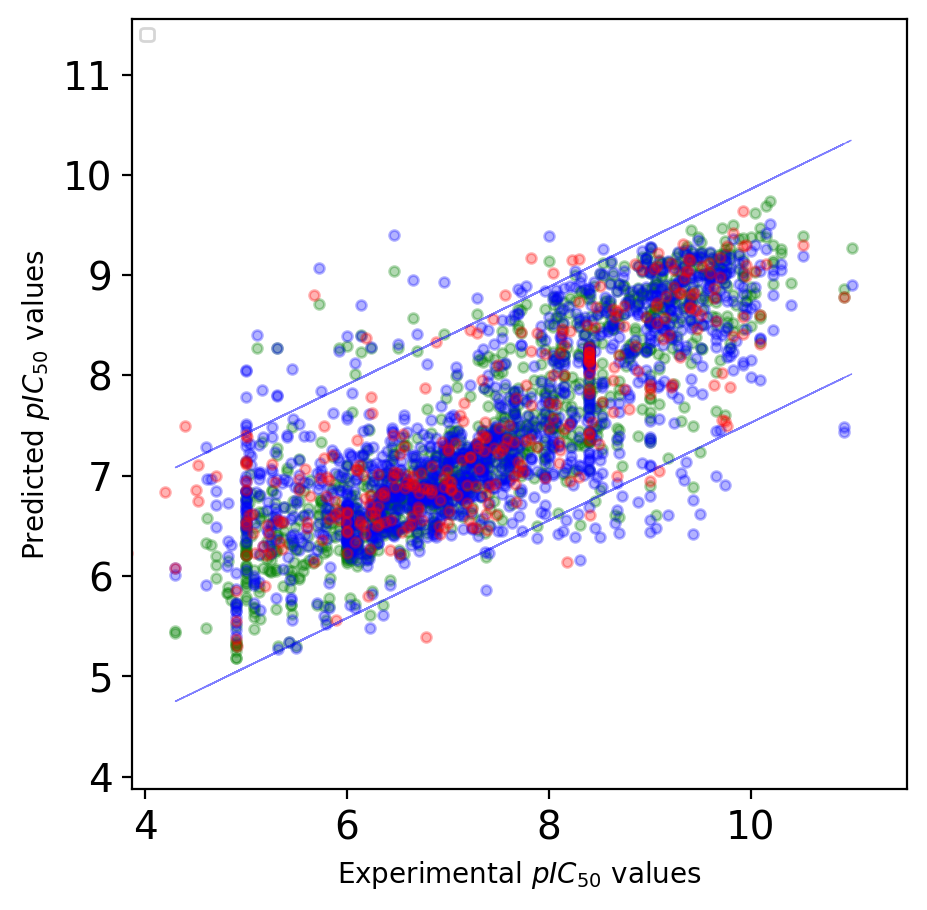

/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:74: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(Q2_CV_mean, R2_train_mean, s=100, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain, \
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


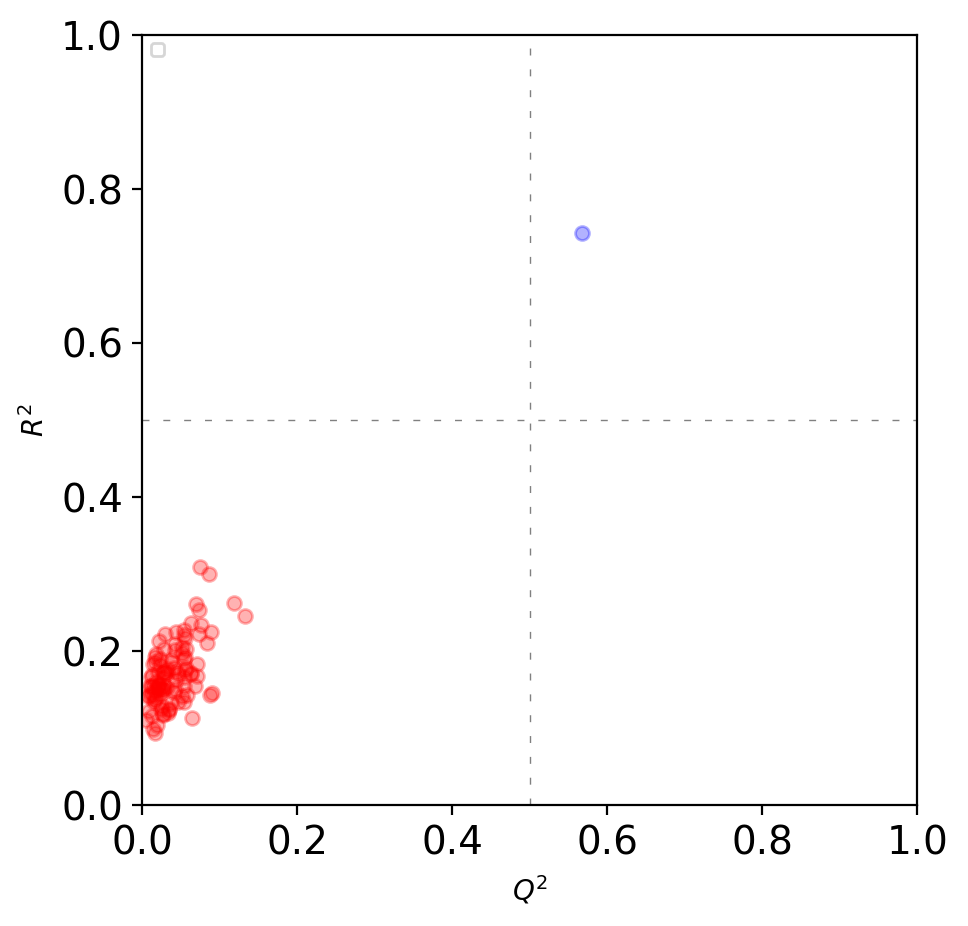

top10 ['PubchemFP737', 'PubchemFP645', 'PubchemFP695', 'PubchemFP199', 'PubchemFP734', 'PubchemFP502', 'PubchemFP334', 'PubchemFP338', 'PubchemFP712', 'PubchemFP261']

top20 ['PubchemFP737', 'PubchemFP645', 'PubchemFP695', 'PubchemFP199', 'PubchemFP734', 'PubchemFP502', 'PubchemFP334', 'PubchemFP338', 'PubchemFP712', 'PubchemFP261', 'PubchemFP580', 'PubchemFP697', 'PubchemFP646', 'PubchemFP728', 'PubchemFP19', 'PubchemFP539', 'PubchemFP374', 'PubchemFP528', 'PubchemFP638', 'PubchemFP23']

top30 ['PubchemFP737', 'PubchemFP645', 'PubchemFP695', 'PubchemFP199', 'PubchemFP734', 'PubchemFP502', 'PubchemFP334', 'PubchemFP338', 'PubchemFP712', 'PubchemFP261', 'PubchemFP580', 'PubchemFP697', 'PubchemFP646', 'PubchemFP728', 'PubchemFP19', 'PubchemFP539', 'PubchemFP374', 'PubchemFP528', 'PubchemFP638', 'PubchemFP23', 'PubchemFP143', 'PubchemFP569', 'PubchemFP385', 'PubchemFP696', 'PubchemFP372', 'PubchemFP389', 'PubchemFP193', 'PubchemFP643', 'PubchemFP391', 'PubchemFP577']

top40 ['PubchemFP737

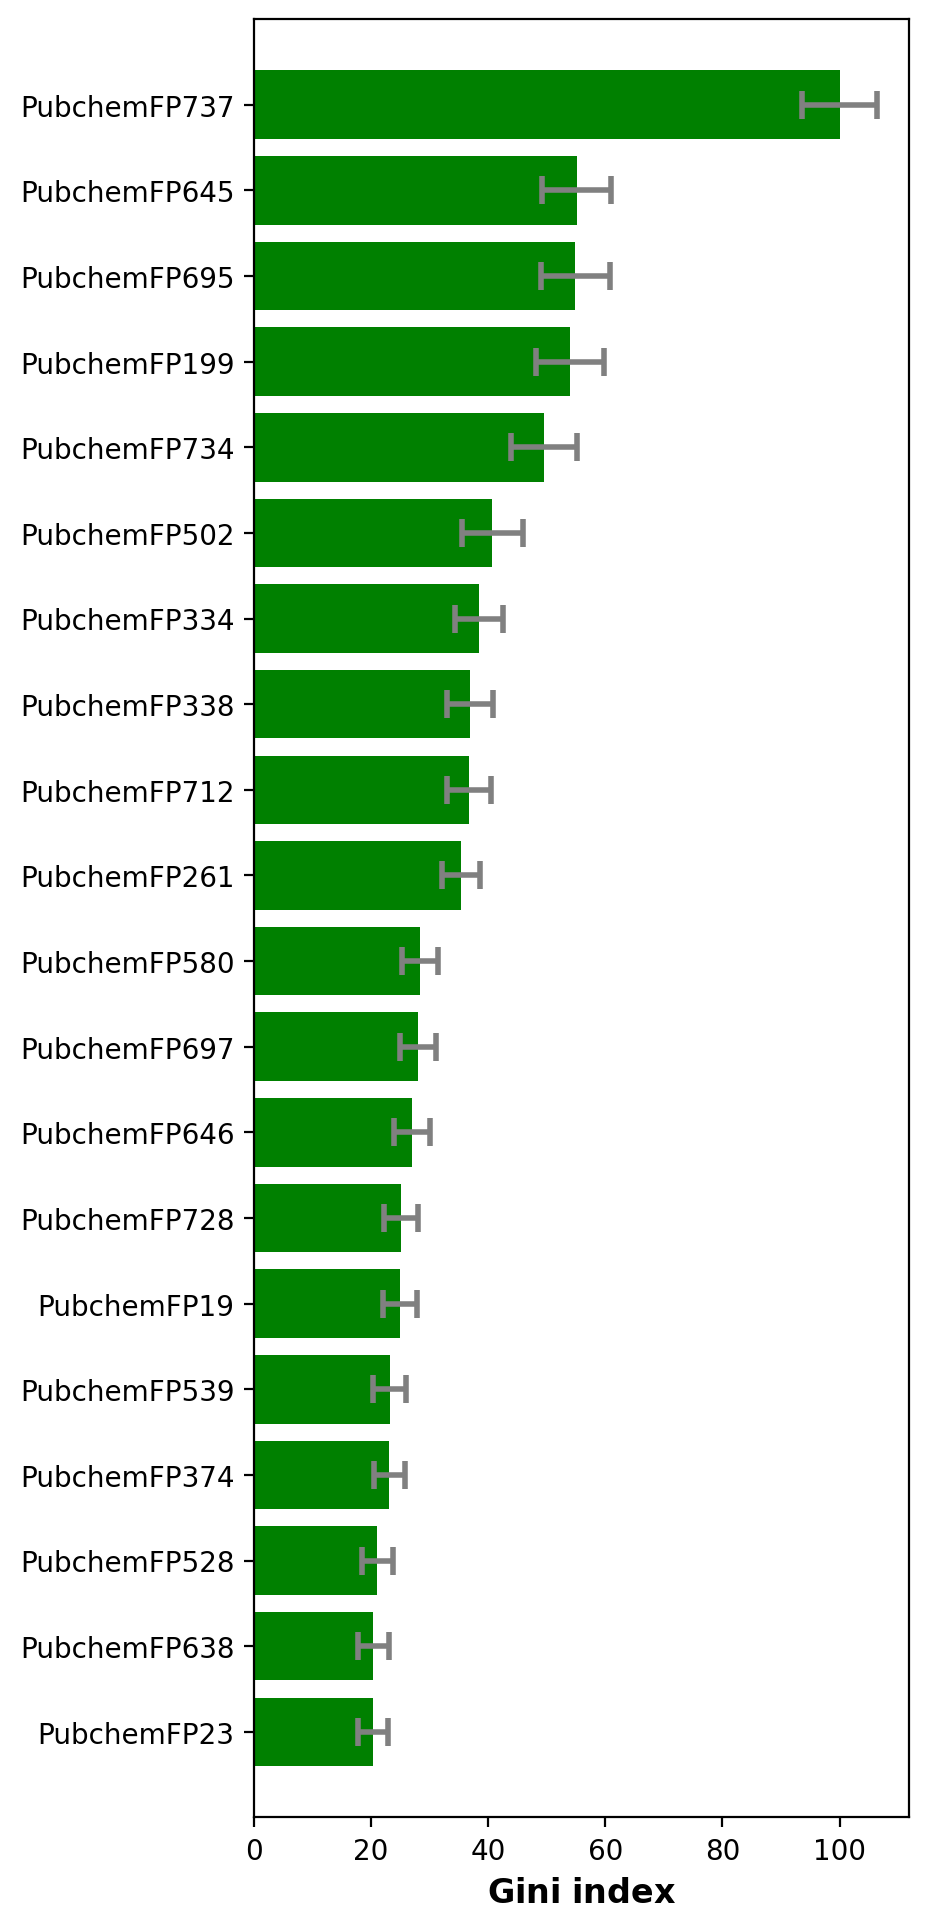



************************************************************************************

QSAR/EState_Aurora.csv

from Remove useless descriptor:
The initial set of 79 descriptors has been reduced to 28 descriptors.
from Remove correlation
The initial set of 28 descriptors has been reduced to 27 descriptors.
<_io.TextIOWrapper name='Result/Aurora_IC50_Revision.csv' mode='a' encoding='UTF-8'> ['EState_Aurora.csv'],1356,79,28,27,0.5216,0.0063,0.8755,0.0039,1356,0.3586,0.0088,0.9480,0.0039,340,0.3473,0.0255,0.8799,0.0299

Training set
------------
N: 1356
R2: 0.5216
std_R2: 0.0063
RMSE: 0.8755
std_RMSE: 0.0039

Cross-validation set
------------
N: 1356
Q2: 0.3586
std_Q2: 0.0088
RMSE: 0.9480
std_RMSE: 0.0039

External set
------------
N: 340
Q2_EXt: 0.3473
std_Q2_EXt: 0.0255
RMSE: 0.8799
std_RMSE: 0.0299


/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_train, y_train, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


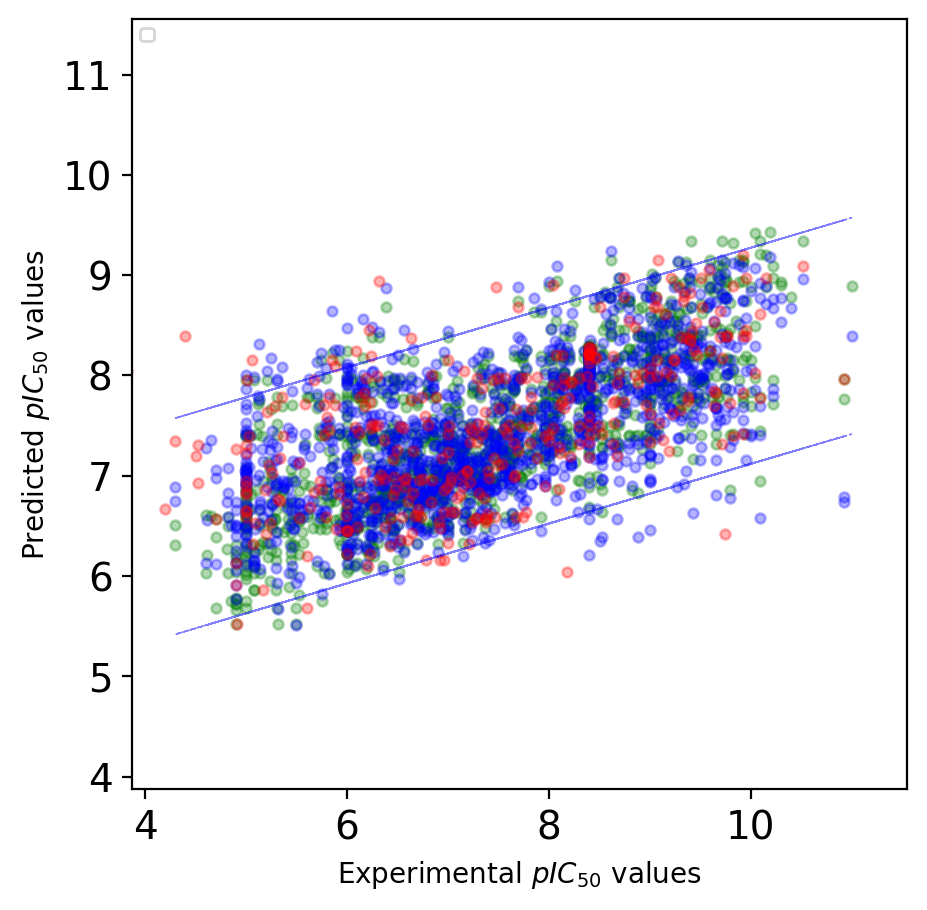

/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:74: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(Q2_CV_mean, R2_train_mean, s=100, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain, \
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


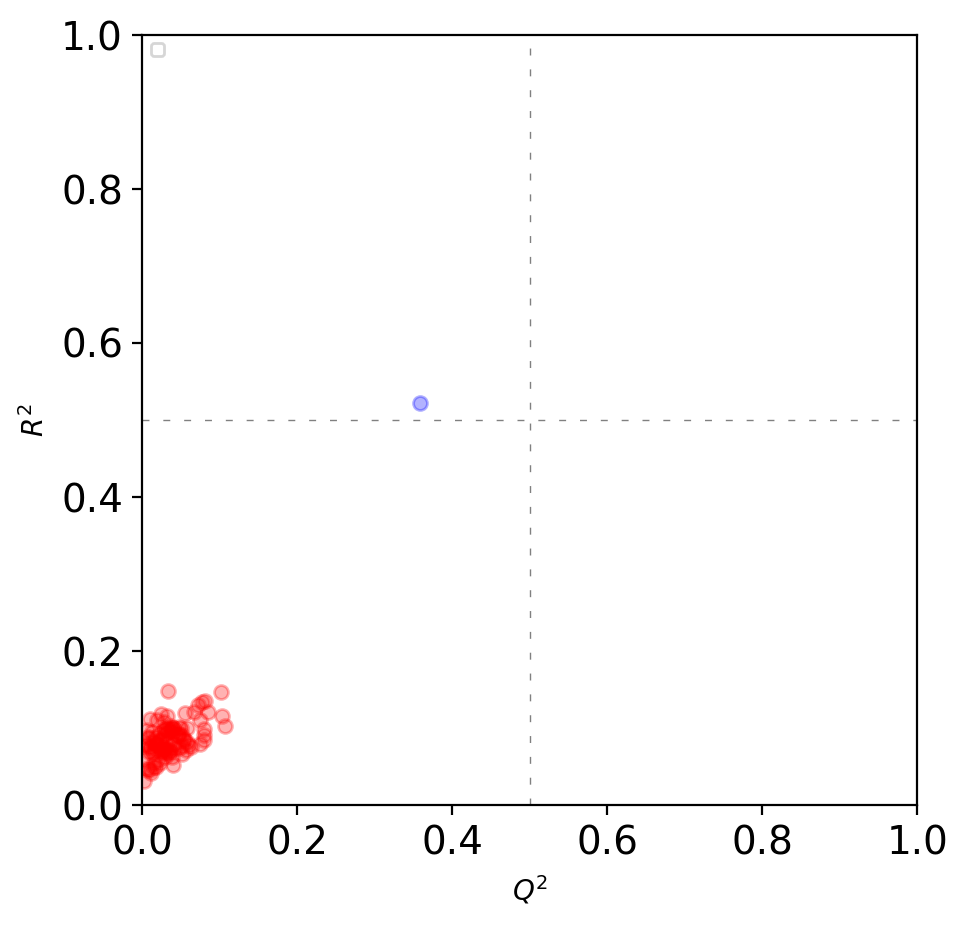

top10 ['EStateFP21', 'EStateFP13', 'EStateFP19', 'EStateFP9', 'EStateFP7', 'EStateFP25', 'EStateFP30', 'EStateFP18', 'EStateFP38', 'EStateFP36']

top20 ['EStateFP21', 'EStateFP13', 'EStateFP19', 'EStateFP9', 'EStateFP7', 'EStateFP25', 'EStateFP30', 'EStateFP18', 'EStateFP38', 'EStateFP36', 'EStateFP54', 'EStateFP51', 'EStateFP34', 'EStateFP28', 'EStateFP37', 'EStateFP32', 'EStateFP24', 'EStateFP16', 'EStateFP35', 'EStateFP11']

top30 ['EStateFP21', 'EStateFP13', 'EStateFP19', 'EStateFP9', 'EStateFP7', 'EStateFP25', 'EStateFP30', 'EStateFP18', 'EStateFP38', 'EStateFP36', 'EStateFP54', 'EStateFP51', 'EStateFP34', 'EStateFP28', 'EStateFP37', 'EStateFP32', 'EStateFP24', 'EStateFP16', 'EStateFP35', 'EStateFP11', 'EStateFP70', 'EStateFP50', 'EStateFP31', 'EStateFP53', 'EStateFP15', 'EStateFP29', 'EStateFP8']

top40 ['EStateFP21', 'EStateFP13', 'EStateFP19', 'EStateFP9', 'EStateFP7', 'EStateFP25', 'EStateFP30', 'EStateFP18', 'EStateFP38', 'EStateFP36', 'EStateFP54', 'EStateFP51', 'EStateFP34'

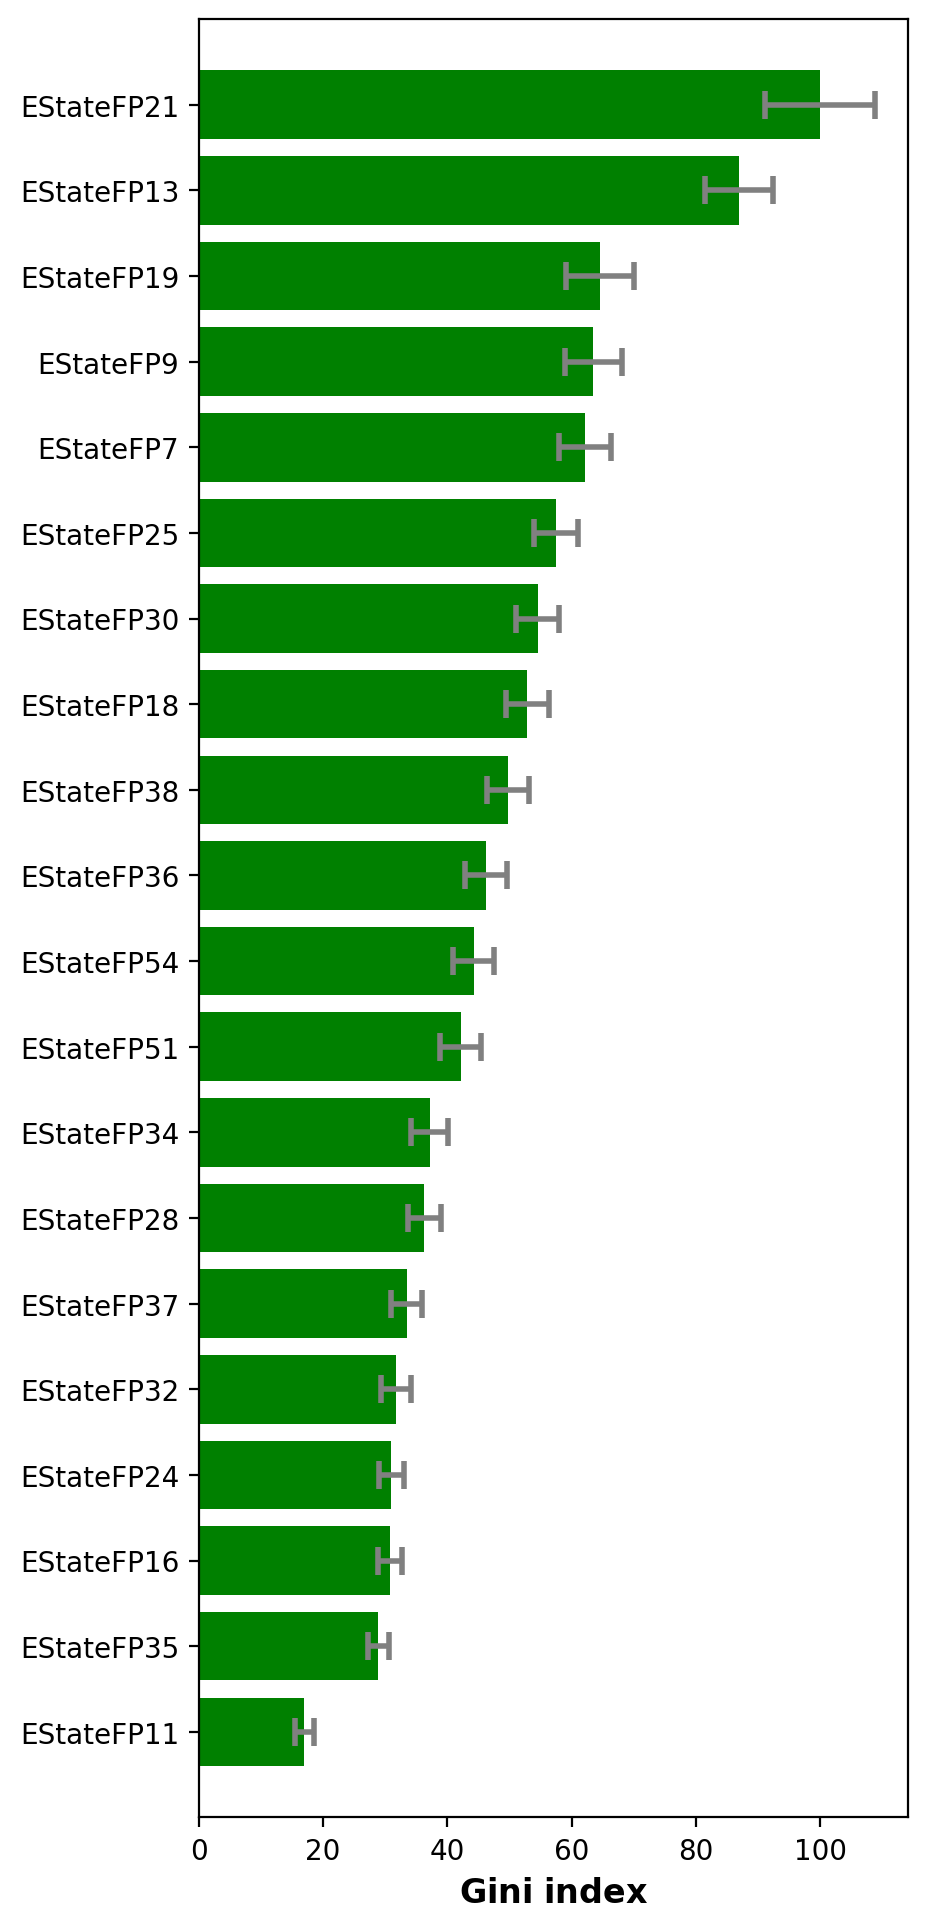



************************************************************************************

QSAR/CDK_Aurora.csv

from Remove useless descriptor:
The initial set of 1024 descriptors has been reduced to 1018 descriptors.
from Remove correlation
The initial set of 1018 descriptors has been reduced to 969 descriptors.
<_io.TextIOWrapper name='Result/Aurora_IC50_Revision.csv' mode='a' encoding='UTF-8'> ['CDK_Aurora.csv'],1356,1024,1018,969,0.8556,0.0045,0.6228,0.0041,1356,0.6237,0.0116,0.7975,0.0062,340,0.6682,0.0347,0.5893,0.0324

Training set
------------
N: 1356
R2: 0.8556
std_R2: 0.0045
RMSE: 0.6228
std_RMSE: 0.0041

Cross-validation set
------------
N: 1356
Q2: 0.6237
std_Q2: 0.0116
RMSE: 0.7975
std_RMSE: 0.0062

External set
------------
N: 340
Q2_EXt: 0.6682
std_Q2_EXt: 0.0347
RMSE: 0.5893
std_RMSE: 0.0324


/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_train, y_train, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


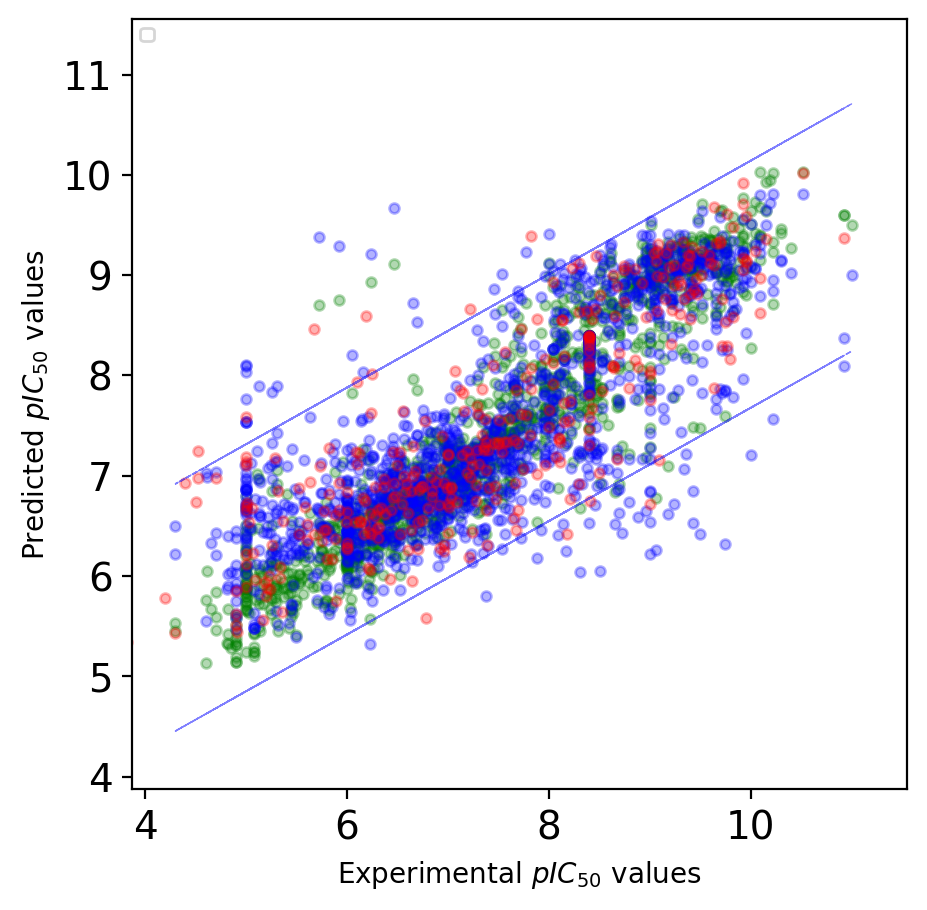

/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:74: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(Q2_CV_mean, R2_train_mean, s=100, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain, \
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


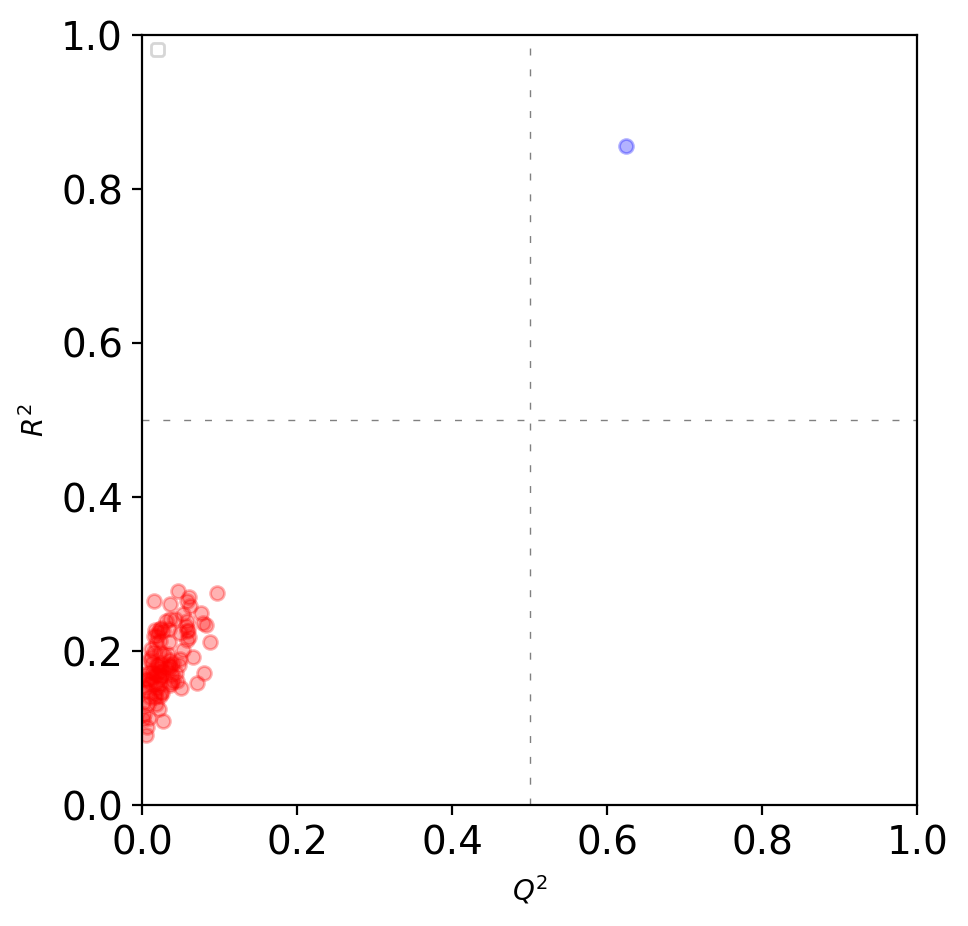

top10 ['FP986', 'FP434', 'FP604', 'FP562', 'FP366', 'FP858', 'FP874', 'FP841', 'FP967', 'FP400']

top20 ['FP986', 'FP434', 'FP604', 'FP562', 'FP366', 'FP858', 'FP874', 'FP841', 'FP967', 'FP400', 'FP251', 'FP74', 'FP857', 'FP286', 'FP739', 'FP541', 'FP782', 'FP667', 'FP717', 'FP1012']

top30 ['FP986', 'FP434', 'FP604', 'FP562', 'FP366', 'FP858', 'FP874', 'FP841', 'FP967', 'FP400', 'FP251', 'FP74', 'FP857', 'FP286', 'FP739', 'FP541', 'FP782', 'FP667', 'FP717', 'FP1012', 'FP93', 'FP431', 'FP39', 'FP411', 'FP784', 'FP687', 'FP712', 'FP1022', 'FP241', 'FP694']

top40 ['FP986', 'FP434', 'FP604', 'FP562', 'FP366', 'FP858', 'FP874', 'FP841', 'FP967', 'FP400', 'FP251', 'FP74', 'FP857', 'FP286', 'FP739', 'FP541', 'FP782', 'FP667', 'FP717', 'FP1012', 'FP93', 'FP431', 'FP39', 'FP411', 'FP784', 'FP687', 'FP712', 'FP1022', 'FP241', 'FP694', 'FP1008', 'FP966', 'FP811', 'FP605', 'FP902', 'FP173', 'FP138', 'FP868', 'FP458', 'FP402']

top50 ['FP986', 'FP434', 'FP604', 'FP562', 'FP366', 'FP858', 'FP874',

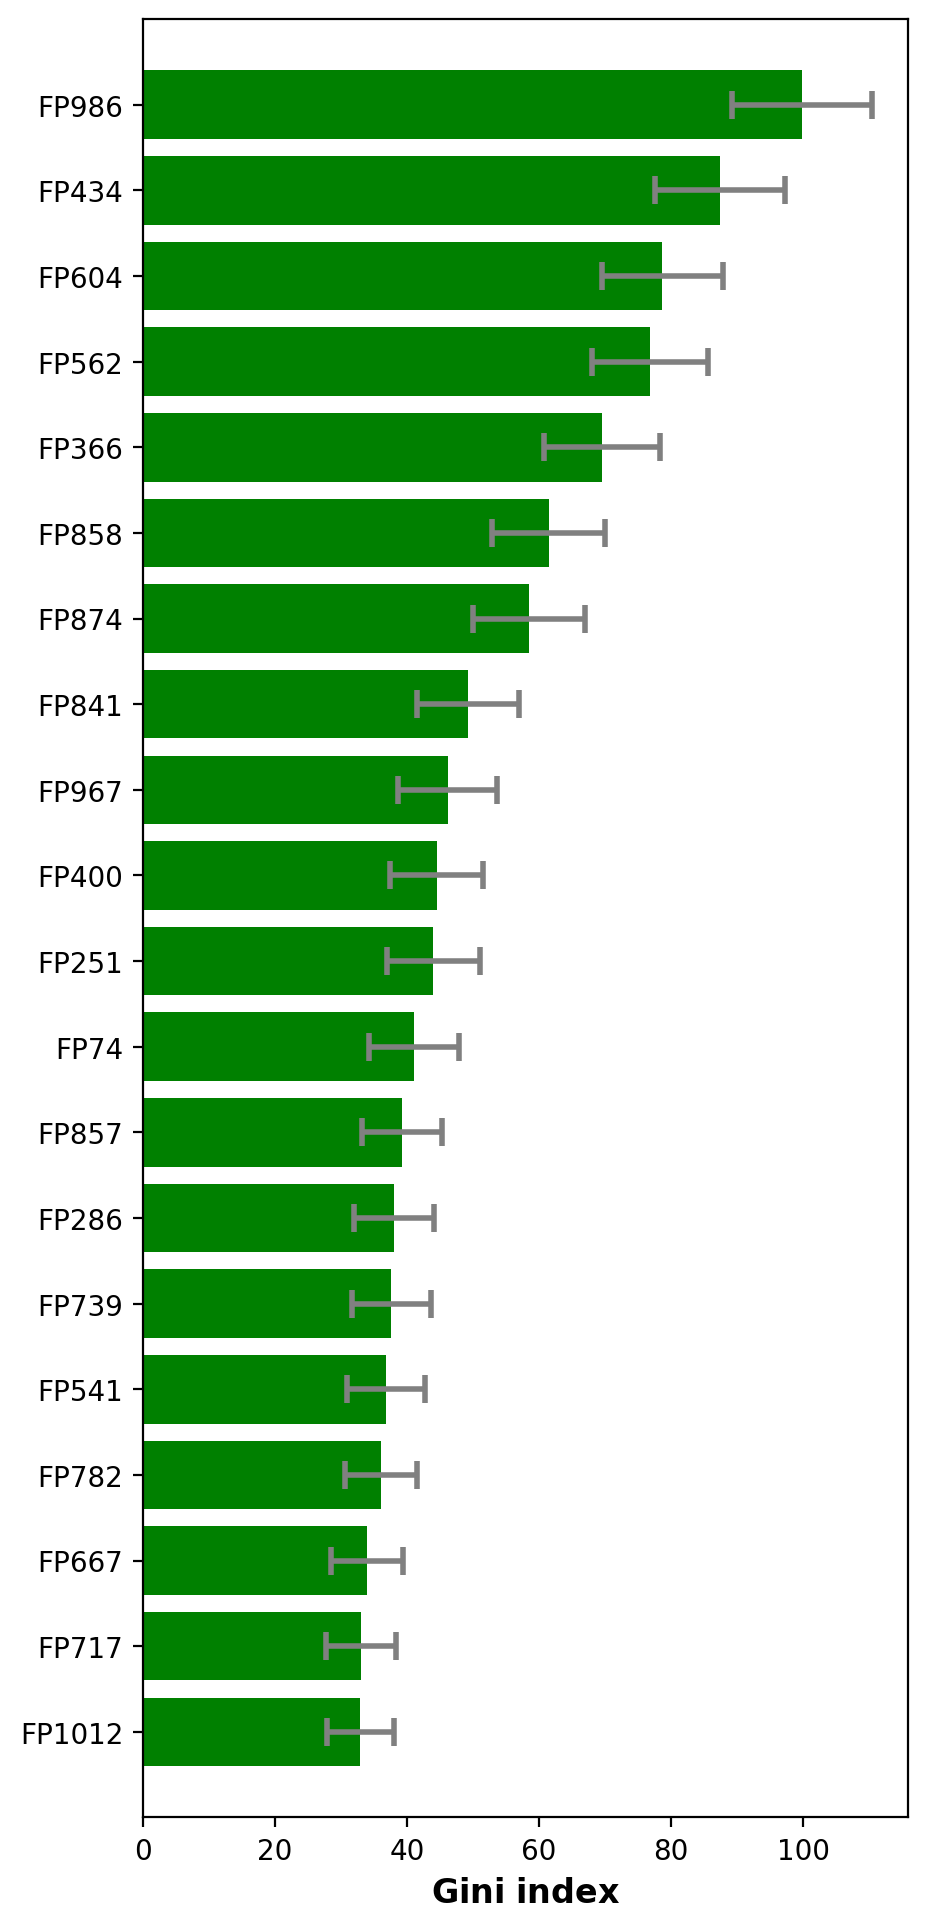



************************************************************************************

QSAR/SubstructureCount_Aurora.csv

from Remove useless descriptor:
The initial set of 307 descriptors has been reduced to 75 descriptors.
from Remove correlation
The initial set of 75 descriptors has been reduced to 56 descriptors.
<_io.TextIOWrapper name='Result/Aurora_IC50_Revision.csv' mode='a' encoding='UTF-8'> ['SubstructureCount_Aurora.csv'],1356,307,75,56,0.7446,0.0058,0.7289,0.0044,1356,0.5540,0.0099,0.8394,0.0051,340,0.5845,0.0331,0.6659,0.0341

Training set
------------
N: 1356
R2: 0.7446
std_R2: 0.0058
RMSE: 0.7289
std_RMSE: 0.0044

Cross-validation set
------------
N: 1356
Q2: 0.5540
std_Q2: 0.0099
RMSE: 0.8394
std_RMSE: 0.0051

External set
------------
N: 340
Q2_EXt: 0.5845
std_Q2_EXt: 0.0331
RMSE: 0.6659
std_RMSE: 0.0341


/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_train, y_train, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


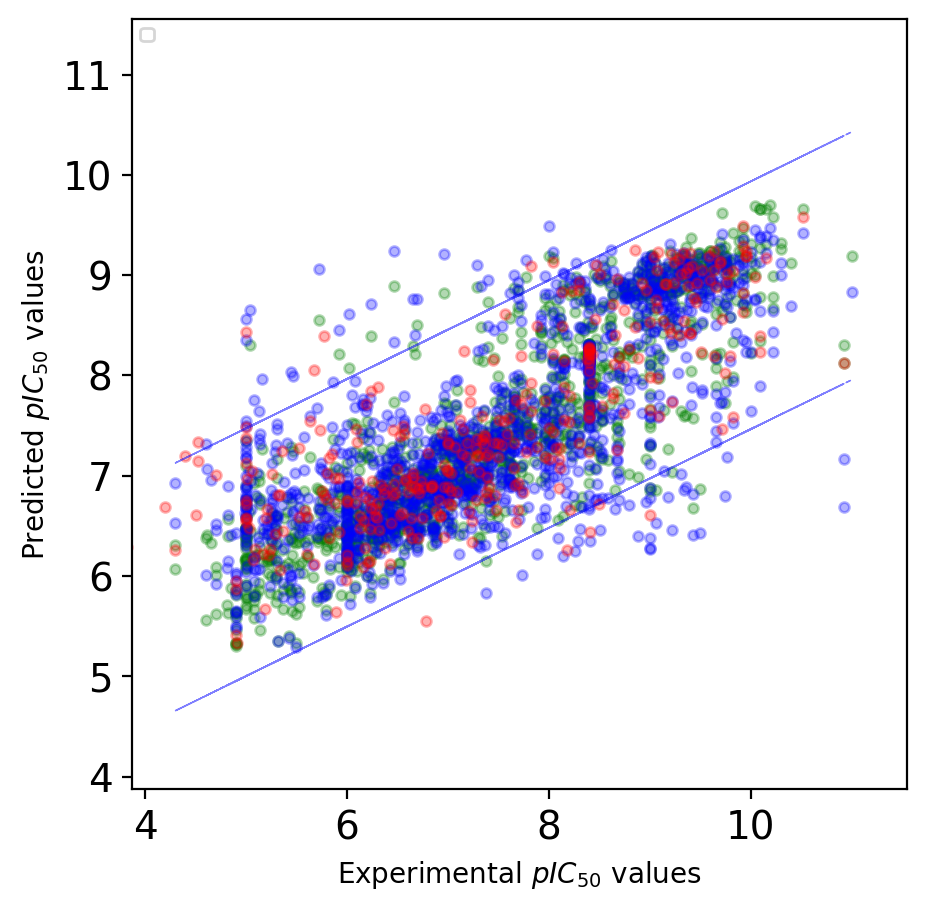

/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:74: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(Q2_CV_mean, R2_train_mean, s=100, marker='.', alpha=0.3,
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_3270/2718270593.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  py.scatter(acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain, \
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


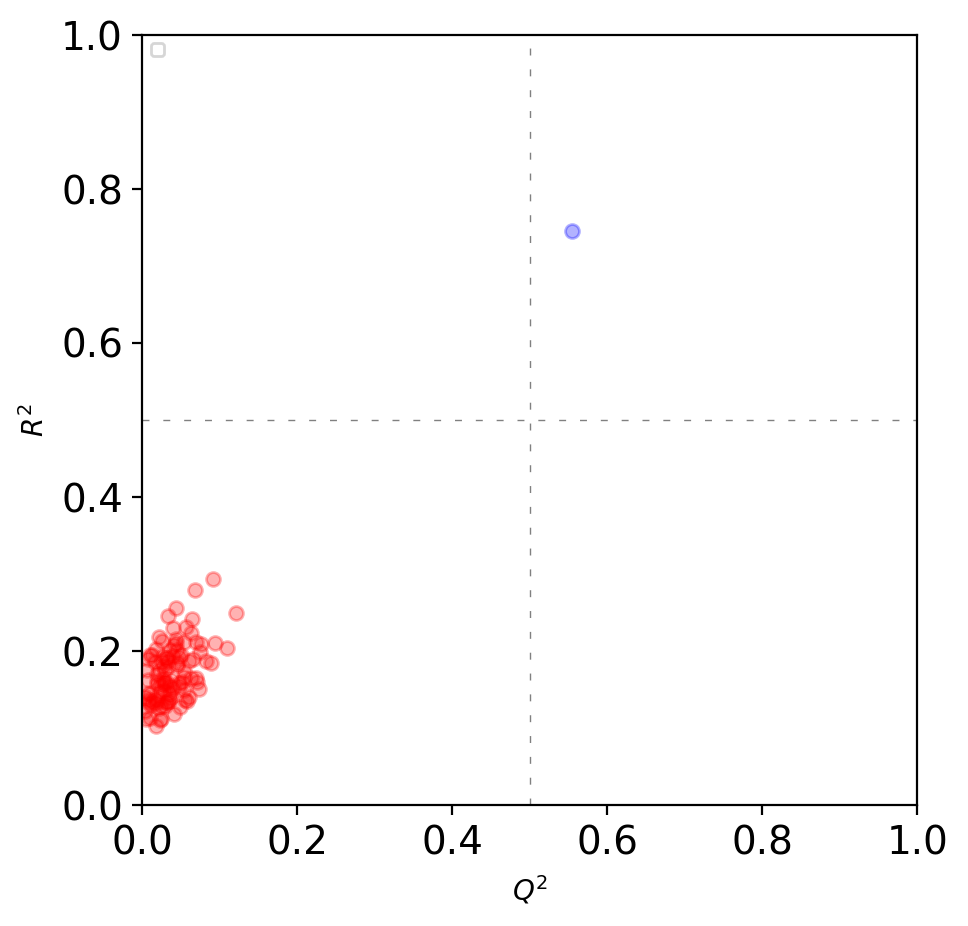

top10 ['SubFPC88', 'SubFPC274', 'SubFPC295', 'SubFPC300', 'SubFPC287', 'SubFPC302', 'SubFPC181', 'SubFPC99', 'SubFPC100', 'SubFPC2']

top20 ['SubFPC88', 'SubFPC274', 'SubFPC295', 'SubFPC300', 'SubFPC287', 'SubFPC302', 'SubFPC181', 'SubFPC99', 'SubFPC100', 'SubFPC2', 'SubFPC135', 'SubFPC1', 'SubFPC4', 'SubFPC143', 'SubFPC172', 'SubFPC171', 'SubFPC179', 'SubFPC183', 'SubFPC180', 'SubFPC23']

top30 ['SubFPC88', 'SubFPC274', 'SubFPC295', 'SubFPC300', 'SubFPC287', 'SubFPC302', 'SubFPC181', 'SubFPC99', 'SubFPC100', 'SubFPC2', 'SubFPC135', 'SubFPC1', 'SubFPC4', 'SubFPC143', 'SubFPC172', 'SubFPC171', 'SubFPC179', 'SubFPC183', 'SubFPC180', 'SubFPC23', 'SubFPC9', 'SubFPC18', 'SubFPC28', 'SubFPC84', 'SubFPC19', 'SubFPC3', 'SubFPC182', 'SubFPC32', 'SubFPC5', 'SubFPC16']

top40 ['SubFPC88', 'SubFPC274', 'SubFPC295', 'SubFPC300', 'SubFPC287', 'SubFPC302', 'SubFPC181', 'SubFPC99', 'SubFPC100', 'SubFPC2', 'SubFPC135', 'SubFPC1', 'SubFPC4', 'SubFPC143', 'SubFPC172', 'SubFPC171', 'SubFPC179', 'SubFPC183

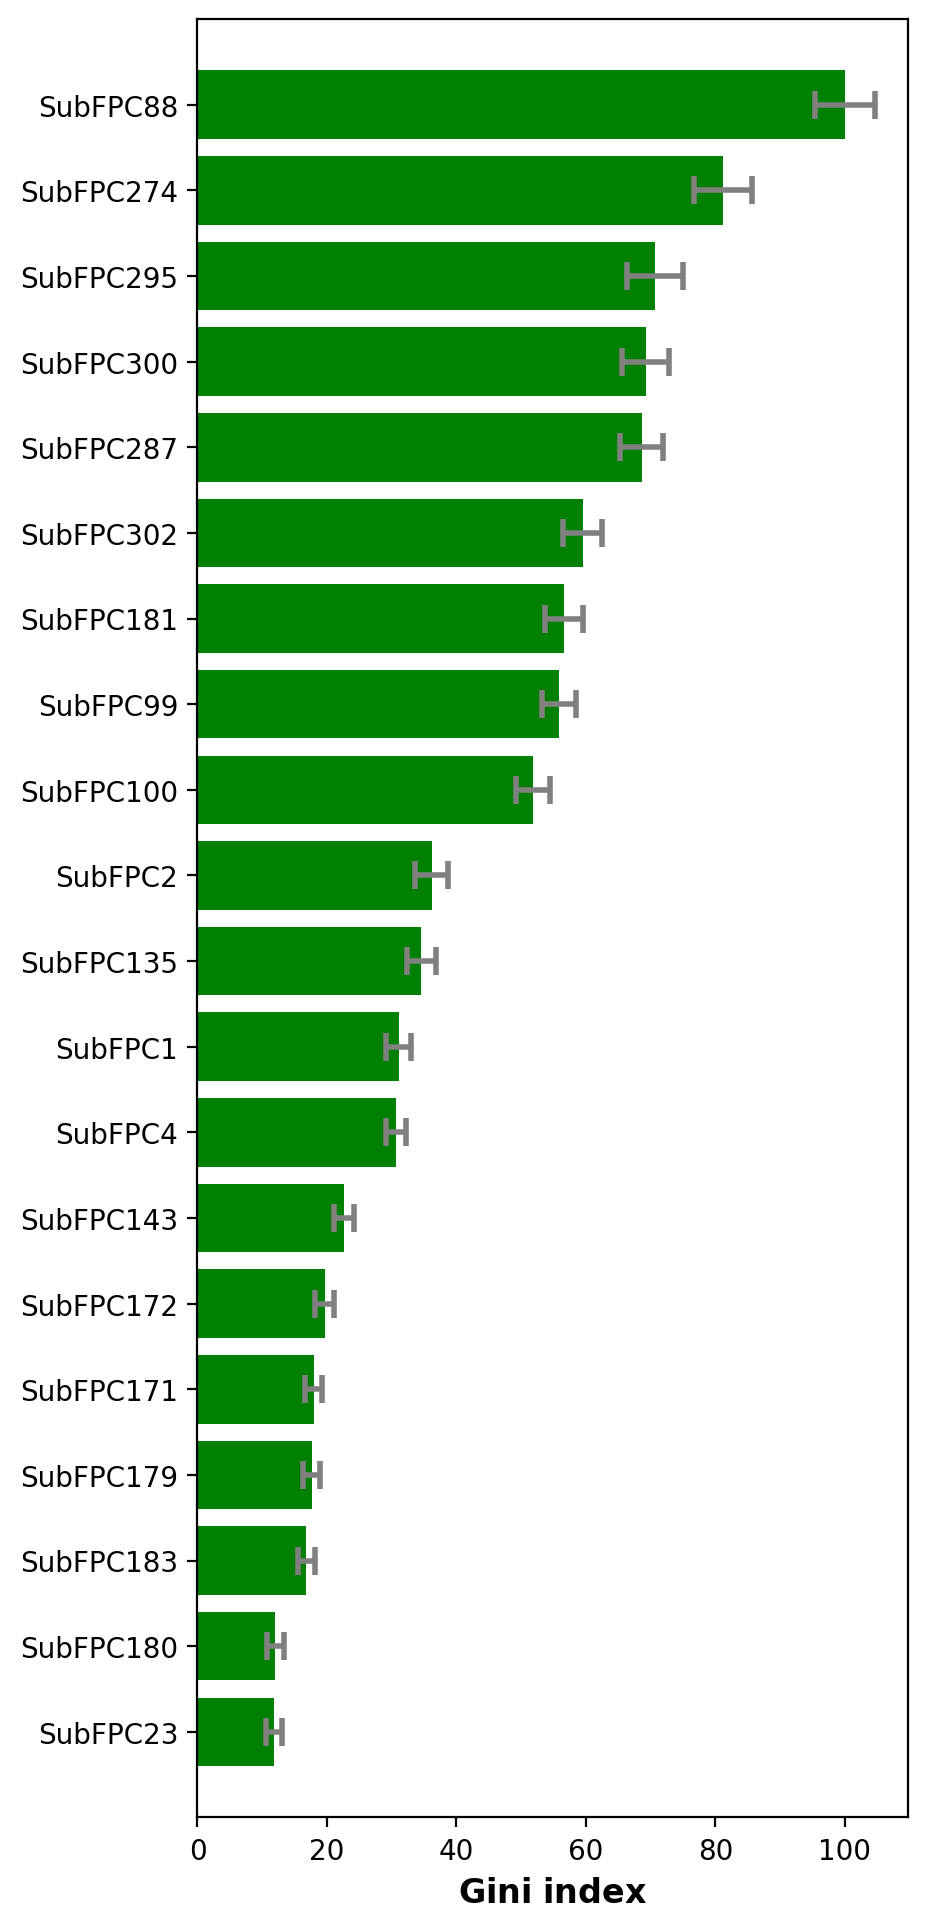

In [37]:
import glob # to read multiple files 
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import os
import pandas as pd

%config InlineBackend.figure_format = 'retina'

!rm Result/Aurora_IC50_Revision.csv

outfile = open('Result/Aurora_IC50_Revision.csv', 'a')

print ('Filename,N_train,Descriptors,Remove STDEV,Remove correlation,'+\
                    'R2_train,R2_train_std,' + \
                    'MAE_train,MAE_train_std,N_CV,Q2_CV,Q2_CV_std,MAE_CV,' + \
                    'MAE_CV_std,N_External,Q2_External,Q2_External_std,MAE_External,MAE_External_std', file = outfile)



path = r'QSAR/'
for f in glob.glob(path + '*.csv'):
    df = pd.read_csv(f)
    df = df.apply(lambda x: pd.to_numeric(x,errors='ignore')) #convert to numeric 
    df = df.fillna(method='ffill')  # fill the missing value in the dataframe
    Y = df["pIC50"].to_numpy().astype(float)#pIC50
    
    data = df.iloc[:,2:] #X(Features)
    
    print ('\n\n************************************************************************************')
    print ('')
    print (f)
    print ('')
    
    data, des1, des2 = Remove_useless_descriptor(data, 0.05)  # Remove correlation cut off 95%
    
    data, des3, des4 = correlation(data, 0.7)  # Remove correlation cut off 0.7
    
    
    
    
    data = pd.DataFrame(data)
    
    h = data.columns.tolist()
    hx = np.array(h)

    data = data.to_numpy().astype(float)
    X = np.array(data)
    
    
    # Prepare empty lists to plot QSAR model  --------------------------------------------------------------------
    R2_train = []
    RMSE_train = []
    Q2_CV = []
    RMSE_CV = []
    Q2_External = []
    RMSE_External = []
    importances_dict = defaultdict(list)
    
    # Prepare empty lists to plot the performance of accuracy.
    acclist_realRF                          = []
    acclist_realRF_predictTrain             = []
    acclist_predictionOnTest_scrambledtrain  = []
    acclist_predictionOnTrain_scrambledtrain = []
        
    
    
    for i in range(10):
        R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, Feature, \
           X_internal, X_external, Y_internal, Y_external, rf, prediction, importances_dict = build_model(X, Y, i, hx, f)
            
    acclist_predictionOnTest_scrambledtrain, acclist_predictionOnTrain_scrambledtrain = Y_scrambling( \
                                                                        X_internal, X_external, Y_internal, Y_external)
    R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, \
        RMSE_External_mean, importances_mean = mean(R2_train, RMSE_train, Q2_CV, RMSE_CV, \
                                 Q2_External, RMSE_External, importances_dict)
    R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std,\
        RMSE_External_std, importances_std = std(R2_train, RMSE_train, Q2_CV, RMSE_CV, \
                                 Q2_External, RMSE_External, importances_dict)
    print_output(R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, 
           RMSE_External_mean, R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std, 
           RMSE_External_std, X_internal, X_external, X, f, des1, des2)
    plot_model(f, X_internal, X_external, Y_internal, Y_external,
                R2_train_mean, Q2_External_mean,
                importances_mean, importances_std, Feature, prediction,
                acclist_predictionOnTest_scrambledtrain, acclist_predictionOnTrain_scrambledtrain)
    
outfile.close()
    #END


In [ ]:
################################Try

In [29]:
import glob # to read multiple files 
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import os
import pandas as pd
from pathlib import Path




path = r'QSAR/'
filenames = glob.glob(path + '*.csv')

for f in filenames: 
    df = pd.read_csv(f)
    df = df.apply(lambda x: pd.to_numeric(x,errors='ignore')) #convert to numeric 
    df = df.fillna(method='ffill')  # fill the missing value in the dataframe
    Y = df["pIC50"].to_numpy().astype(float)#pIC50  
    data = df.iloc[:,2:] #X(Features)
    
    print ('\n\n************************************************************************************')
    print ('')
    print (f)
    print ('')
    
    
    data, des1, des2 = Remove_useless_descriptor(data, 0.05)  # Remove correlation cut off 95%
    data, des3, des4 = correlation(data, 0.7)  # Remove correlation cut off 0.7
  

    #save results
    outpath = r'QSAR/RMcorrelation_uselessDescriptor/' 
    data.to_csv (Path(outpath, f.split('/')[1]) ,index=False)
    
        
        



************************************************************************************

QSAR/MACCS_Aurora.csv

from Remove useless descriptor:
The initial set of 166 descriptors has been reduced to 129 descriptors.
from Remove correlation
The initial set of 129 descriptors has been reduced to 86 descriptors.


************************************************************************************

QSAR/SubstructureCount_Aurora.csv

from Remove useless descriptor:
The initial set of 307 descriptors has been reduced to 75 descriptors.
from Remove correlation
The initial set of 75 descriptors has been reduced to 58 descriptors.


************************************************************************************

QSAR/CDKextended_Aurora.csv

from Remove useless descriptor:
The initial set of 1024 descriptors has been reduced to 996 descriptors.
from Remove correlation
The initial set of 996 descriptors has been reduced to 953 descriptors.


**************************************************